In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.metrics import accuracy_score

# First File

## 1

In [19]:
df = pd.read_csv("BM1 (2).csv" )#, parse_dates=['Date'])
df["DateTime"] = pd.to_datetime(df['Date'] + ' ' + df["Time"])
df.drop(['Date', "Time"], axis=1, inplace=True)
for i in list(df.columns):
    try:
        if df[i].sum() == 0:
            df.drop([i], axis=1, inplace=True)
    except Exception as e:
        print(e)

'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'


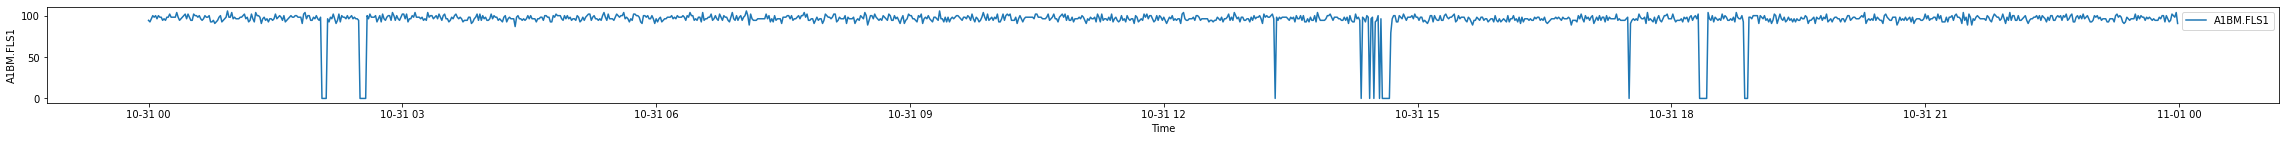

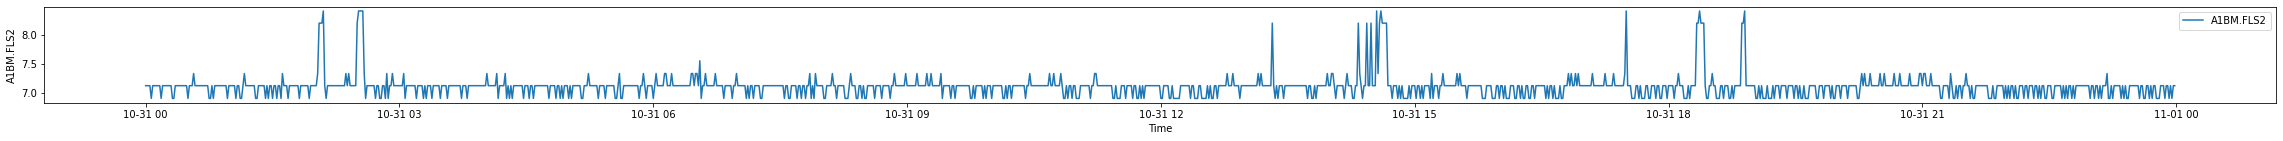

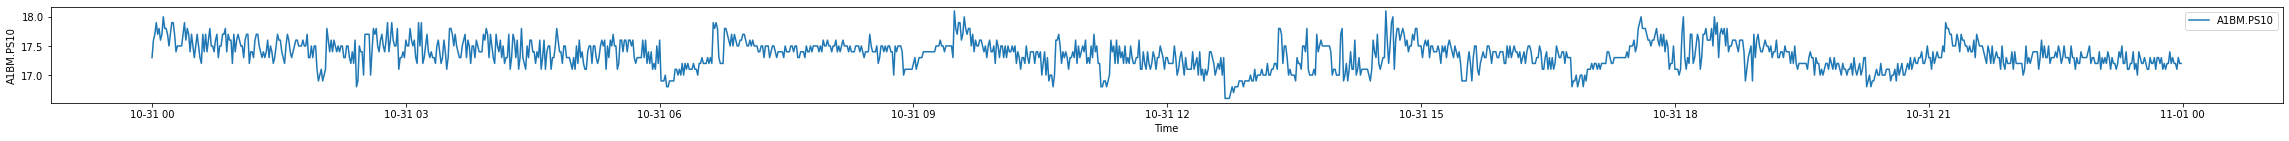

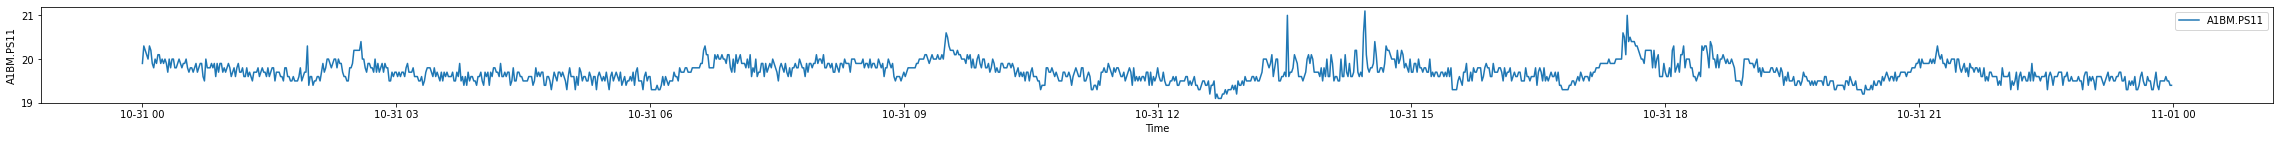

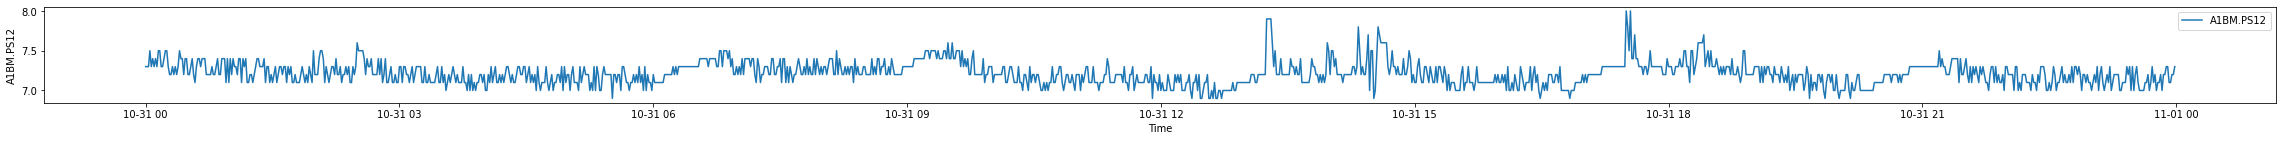

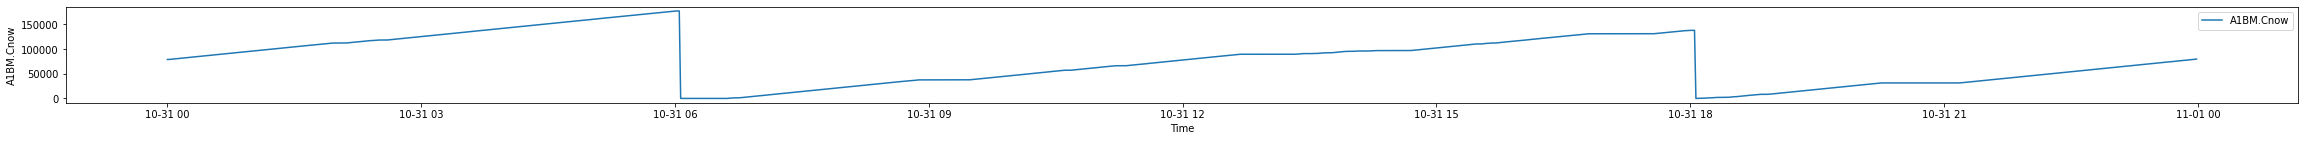

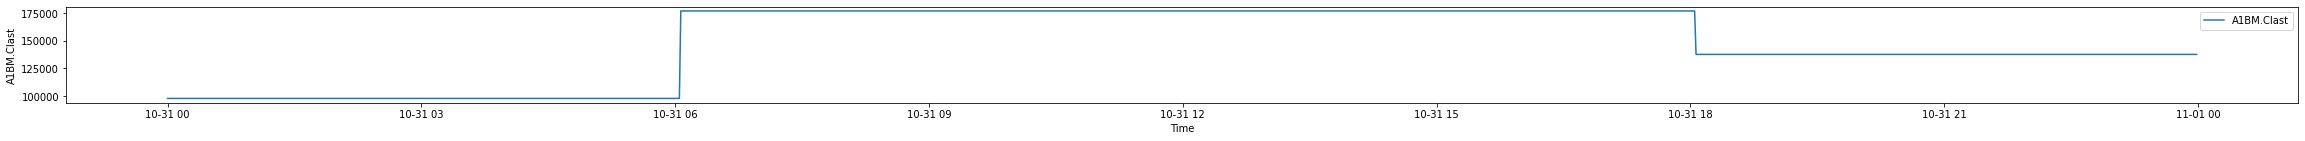

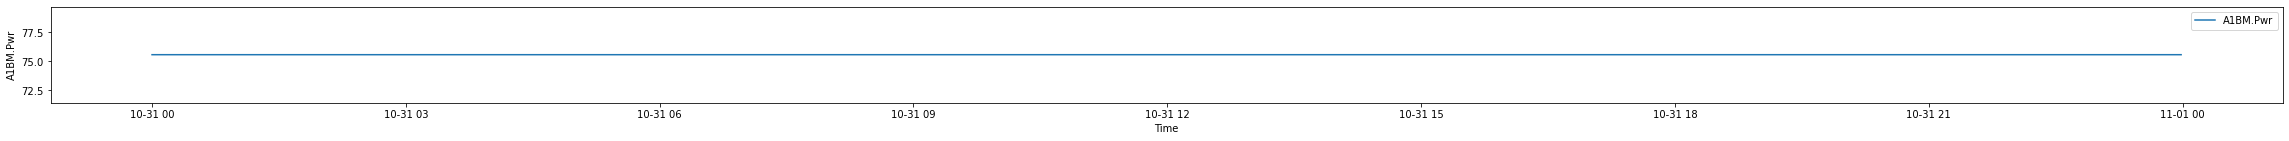

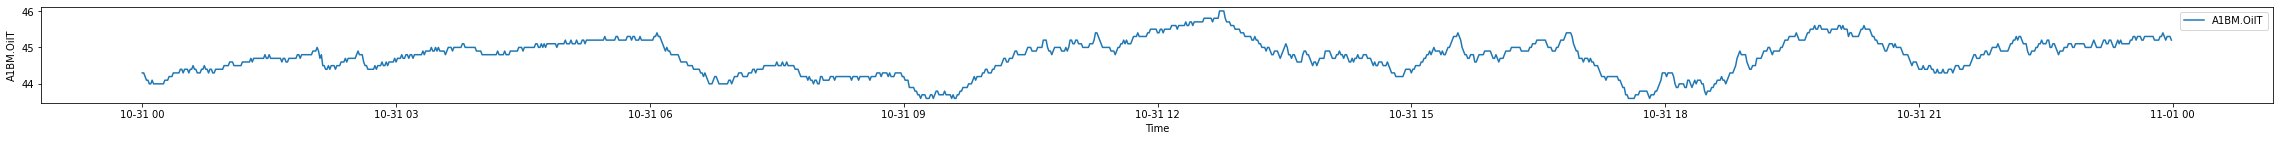

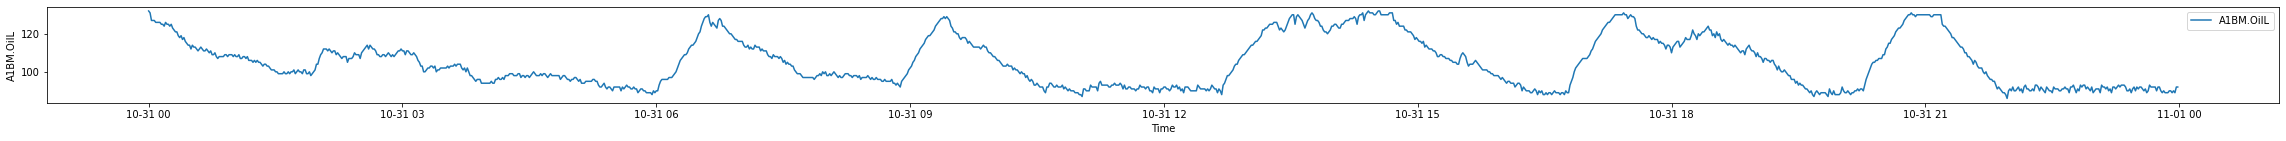

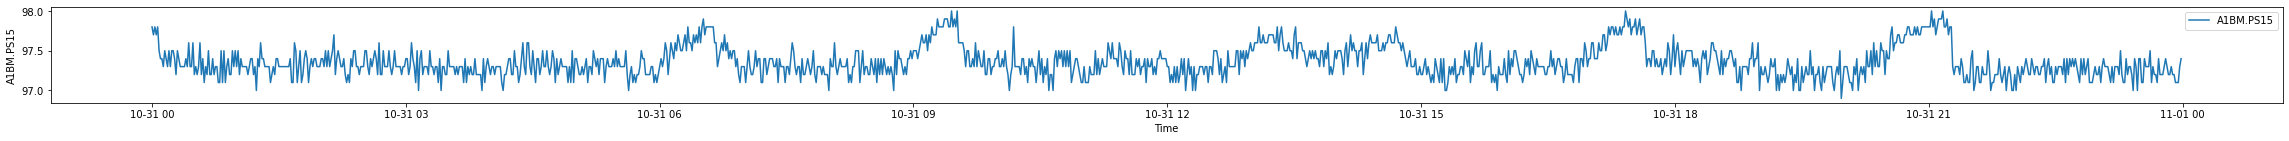

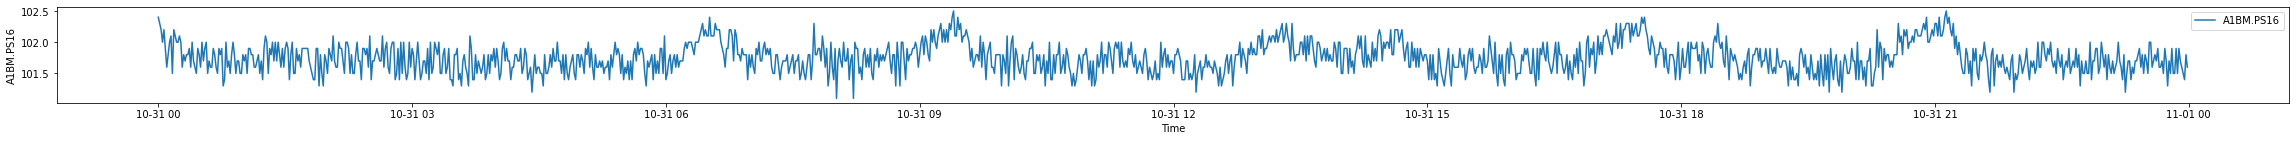

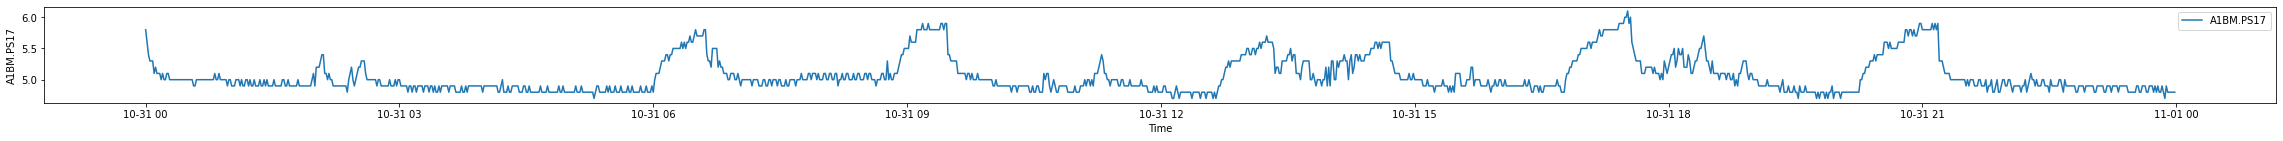

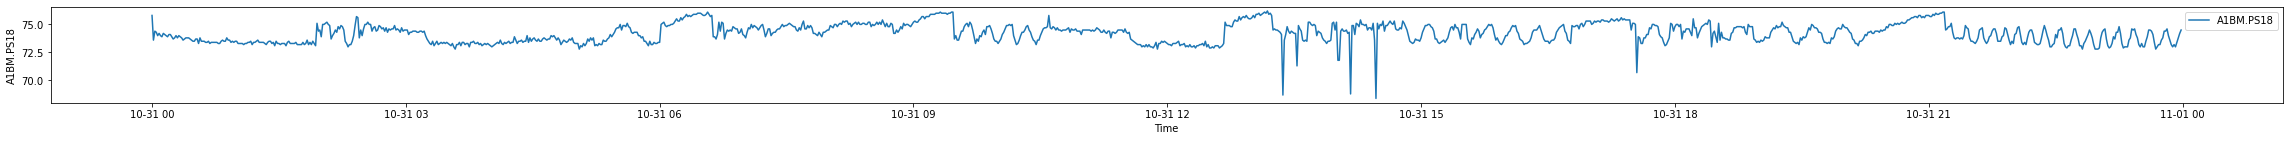

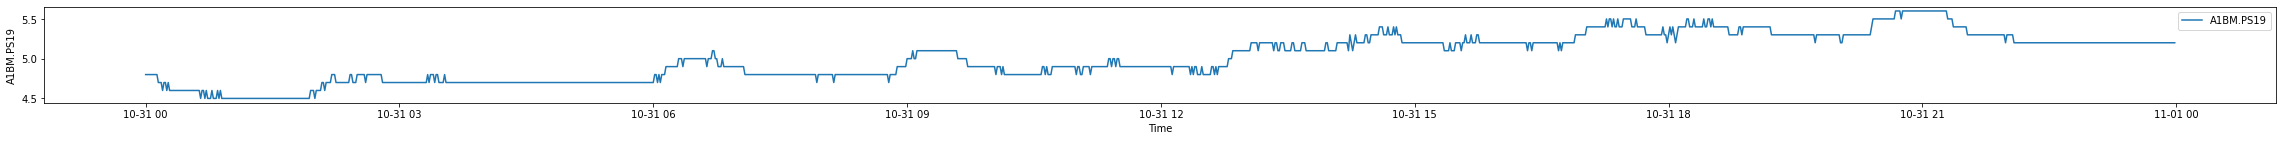

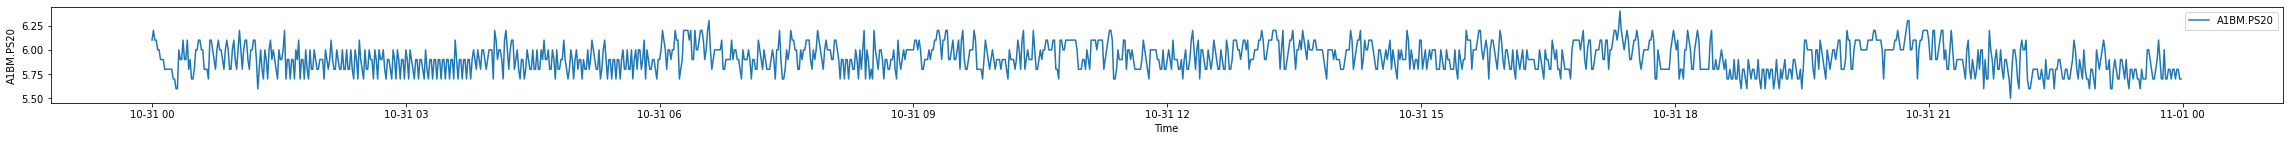

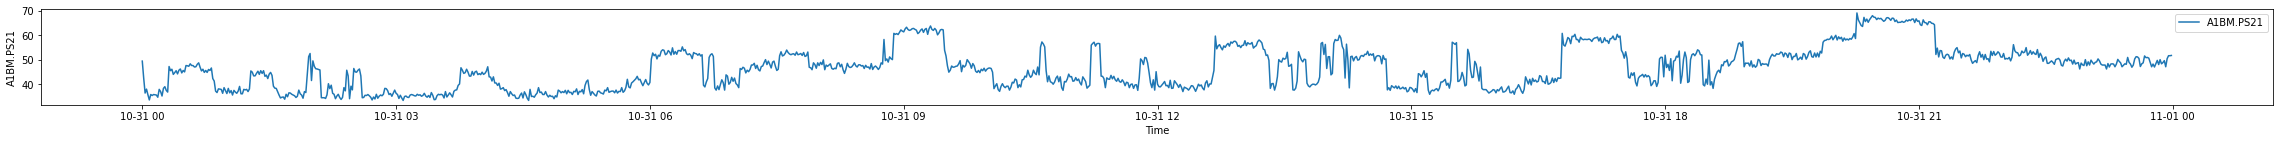

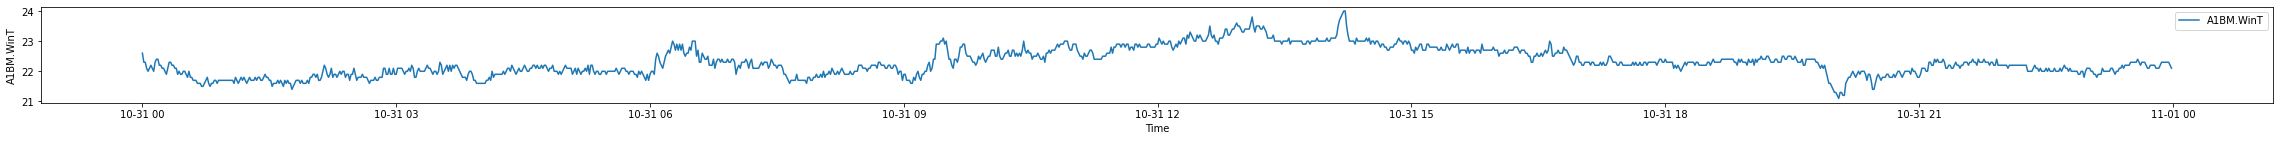

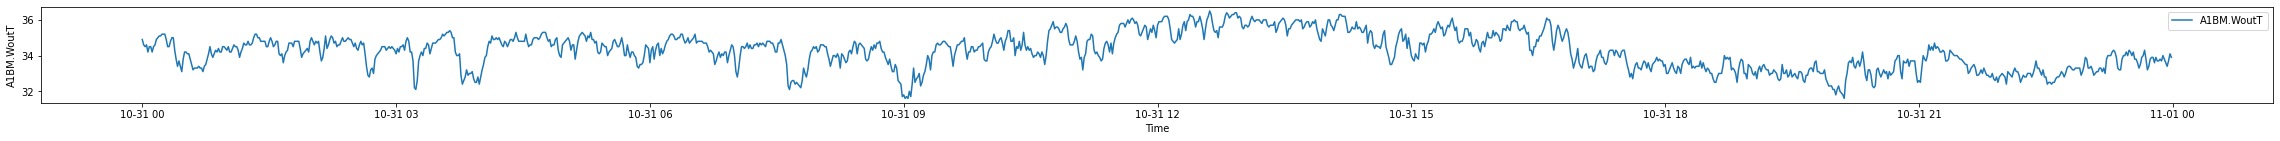

In [20]:
x =list(df.columns)[:-1]
for i in x:
    plt.figure(figsize=(40,40))
    plt.subplot(19,1,x.index(i)+1)
    plt.plot(df["DateTime"], df[i], label=i)
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.legend()
    plt.show()

In [21]:
tr = df[x].values
X_train = []
Y_train = []
try:
    for i in range(20, len(tr)):
        
        #r = (-tr[i-1,]+tr[i,])/60
        Y_train.append([tr[i,], tr[i+1,]])
        X_train.append(tr[i-20:i, :])
except Exception as e:
    print(e)
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape, Y_train.shape

x_train, x_test, y_train, y_test  = train_test_split(X_train, Y_train, test_size=0.05, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
y_train = scaler.fit_transform(y_train.reshape(-1, y_train.shape[-1])).reshape(y_train.shape)
x_train.shape, y_train.shape

index 1440 is out of bounds for axis 0 with size 1440


((1348, 20, 19), (1348, 2, 19))

In [22]:
xtrain, xval, ytrain, yval  = train_test_split(x_train, y_train, test_size=0.1, shuffle=True)
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((1213, 20, 19), (135, 20, 19), (1213, 2, 19), (135, 2, 19))

In [206]:
p = np.array(pd.read_csv("p_1_1.csv", header=None).values)
pp = np.array(pd.read_csv("pp_1_1.csv", header=None).values)

In [232]:
with pd.ExcelWriter('first_file.xlsx') as writer:
    df.iloc[:,[19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].to_excel(writer, sheet_name='original', index=False, startrow=0 , startcol=0)

In [211]:
pp.shape[0]

(71, 19)

1369

In [219]:
rr=np.full((tr.shape[0]-pp.shape[0],19),np.nan)


In [220]:
rr.shape

(1369, 19)

In [222]:
ll = np.concatenate((rr,pp), axis=0)

In [226]:
cf = pd.DataFrame(ll, columns=x)

In [230]:
cf["DateTime"] = df["DateTime"]

In [234]:
with pd.ExcelWriter('first_file.xlsx', engine="openpyxl", mode='a') as writer:
    cf.iloc[:,[19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].to_excel(writer, sheet_name='one_min', index=False, startrow=0 , startcol=0)

In [235]:
diff = (df[x]-cf[x])/60

In [238]:
seconds= [1, 2, 5, 10, 30]
for i in range(len(seconds)):
    pf = df[x] + (diff*seconds[i])
    pf["DateTime"] = df["DateTime"]
    with pd.ExcelWriter('first_file.xlsx', engine="openpyxl", mode='a') as writer:
        pf.iloc[:,[19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].to_excel(writer, sheet_name=f'{seconds[i]}_sec', index=False, startrow=0 , startcol=0)



In [24]:
y_test[:,0,0]

array([ 98.08,  98.08,  98.08,  96.19,  98.08, 101.85,  90.53,  94.3 ,
        98.08,  96.19,  94.3 ,   0.  ,  96.19,  98.08, 103.74,  92.42,
        98.08,  96.19,  96.19,  96.19,  94.3 ,  98.08,  99.96,  98.08,
        92.42,  98.08,  94.3 ,  96.19,  99.96,  99.96,  96.19,  99.96,
        96.19,  98.08,  99.96,  98.08,  94.3 ,  99.96,  98.08,  98.08,
        94.3 , 101.85,  98.08,  96.19,  98.08,  96.19,  94.3 ,   0.  ,
        94.3 ,  92.42,  96.19,  98.08,  96.19,  96.19,  94.3 ,  98.08,
        99.96,  98.08,  92.42,  94.3 ,  99.96,  98.08,  92.42,  94.3 ,
        96.19, 101.85,  92.42,  96.19,  96.19,  94.3 ,  98.08])

In [29]:
pp[:,0]

array([96.48218536, 95.10630798, 97.72310638, 96.11530304, 96.49156189,
       97.41373444, 96.71958923, 96.09066772, 97.7611084 , 95.16609955,
       96.51376343, 97.53407288, 96.00527954, 97.2901535 , 95.81838989,
       95.94992828, 96.88244629, 97.4337616 , 97.65205383, 96.97951508,
       97.33712006, 97.73262024, 95.92713165, 96.07370758, 98.36989594,
       96.79117584, 96.78768921, 97.33709717, 96.66007233, 97.6385498 ,
       98.29283142, 97.21006775, 96.71958923, 96.78203583, 96.00894928,
       97.54566193, 97.2605896 , 98.27767181, 97.10983276, 97.73371124,
       94.65201569, 96.51376343, 96.51376343, 96.55815887, 97.78552246,
       97.47533417, 97.53420258, 96.42337799, 97.0933609 , 96.48265839,
       97.36488342, 97.17221832, 97.03595734, 97.56491089, 97.58267212,
       97.21140289, 97.41168213, 96.90287781, 97.49331665, 95.98368835,
       97.4475174 , 96.89491272, 96.66091919, 96.53858948, 97.47770691,
       95.81428528, 96.21801758, 97.67750549, 97.47084808, 97.72

In [52]:
pred_v = []
true_v = []
for i in range(len(y_test[:,0,0])):
    true_v.append(0)
    if y_test[:,0,0][i] == 0:
        if 0.1 > (np.abs(y_test[:,0,0][i]-(pp[:,0][i]))/y_test[:,0,0].mean()):
            pred_v.append(0)
        else:
            pred_v.append(1)

    else:
        if 0.1 > (np.abs(y_test[:,0,0][i]-(pp[:,0][i]))/y_test[:,0,0][i]):
            pred_v.append(0)
        else:
            pred_v.append(1)

In [53]:
sum(pred_v),
#sum(true_v)

(2,)

In [54]:
accuracy_score(true_v,pred_v)

0.971830985915493

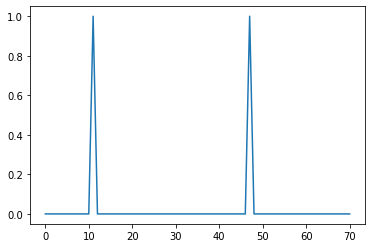

In [55]:
plt.plot(pred_v)

In [94]:
j = 0
t = []
arr=np.full((100-len(pp),1),np.nan)
t.append(np.concatenate((arr, pp[:,j].reshape(-1,1)), axis=0).reshape(-1,1))

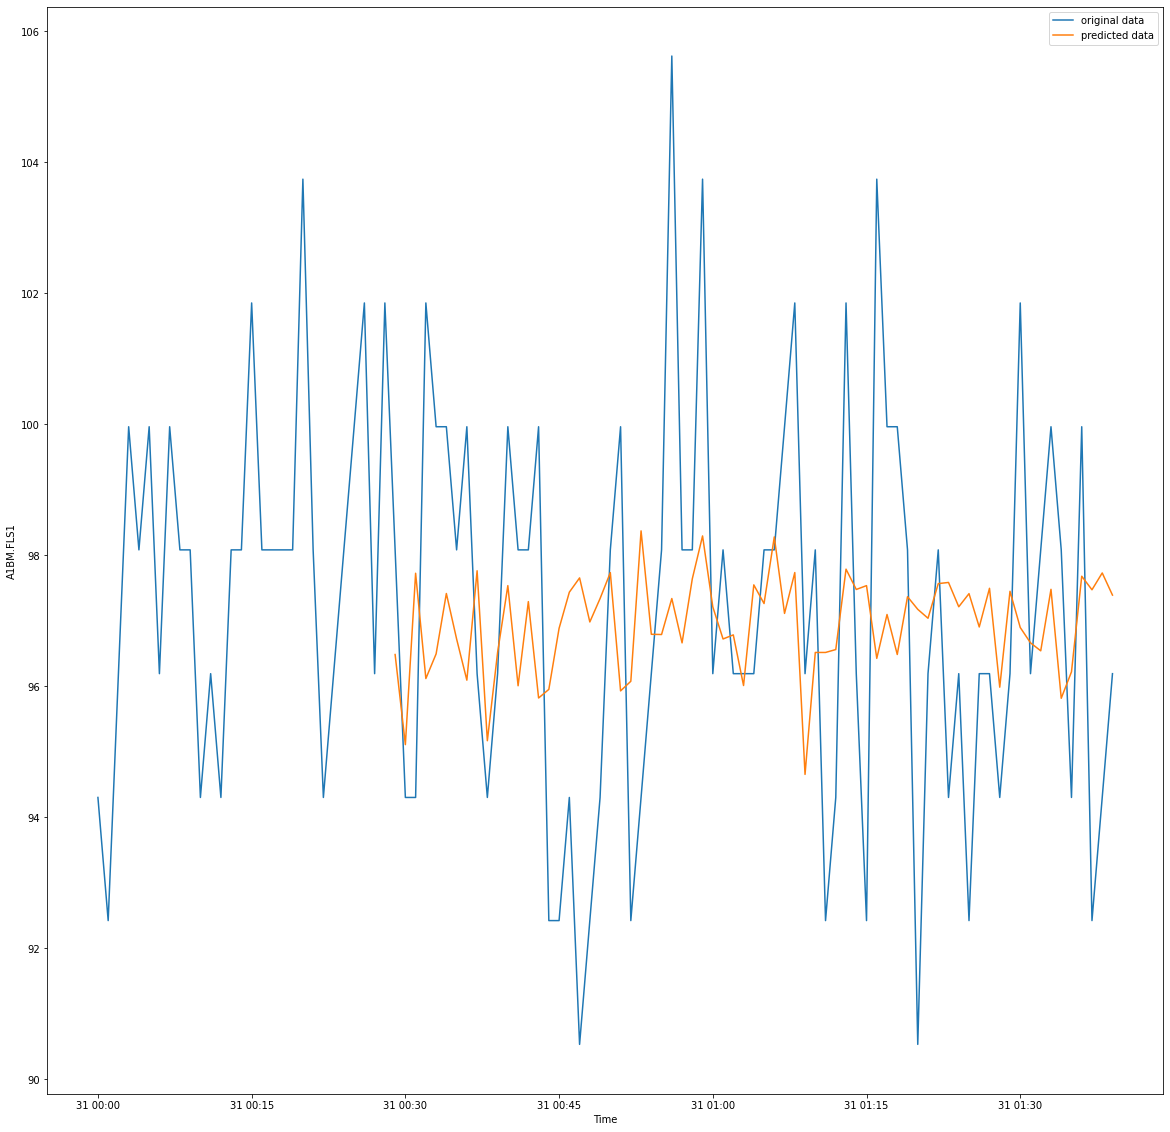

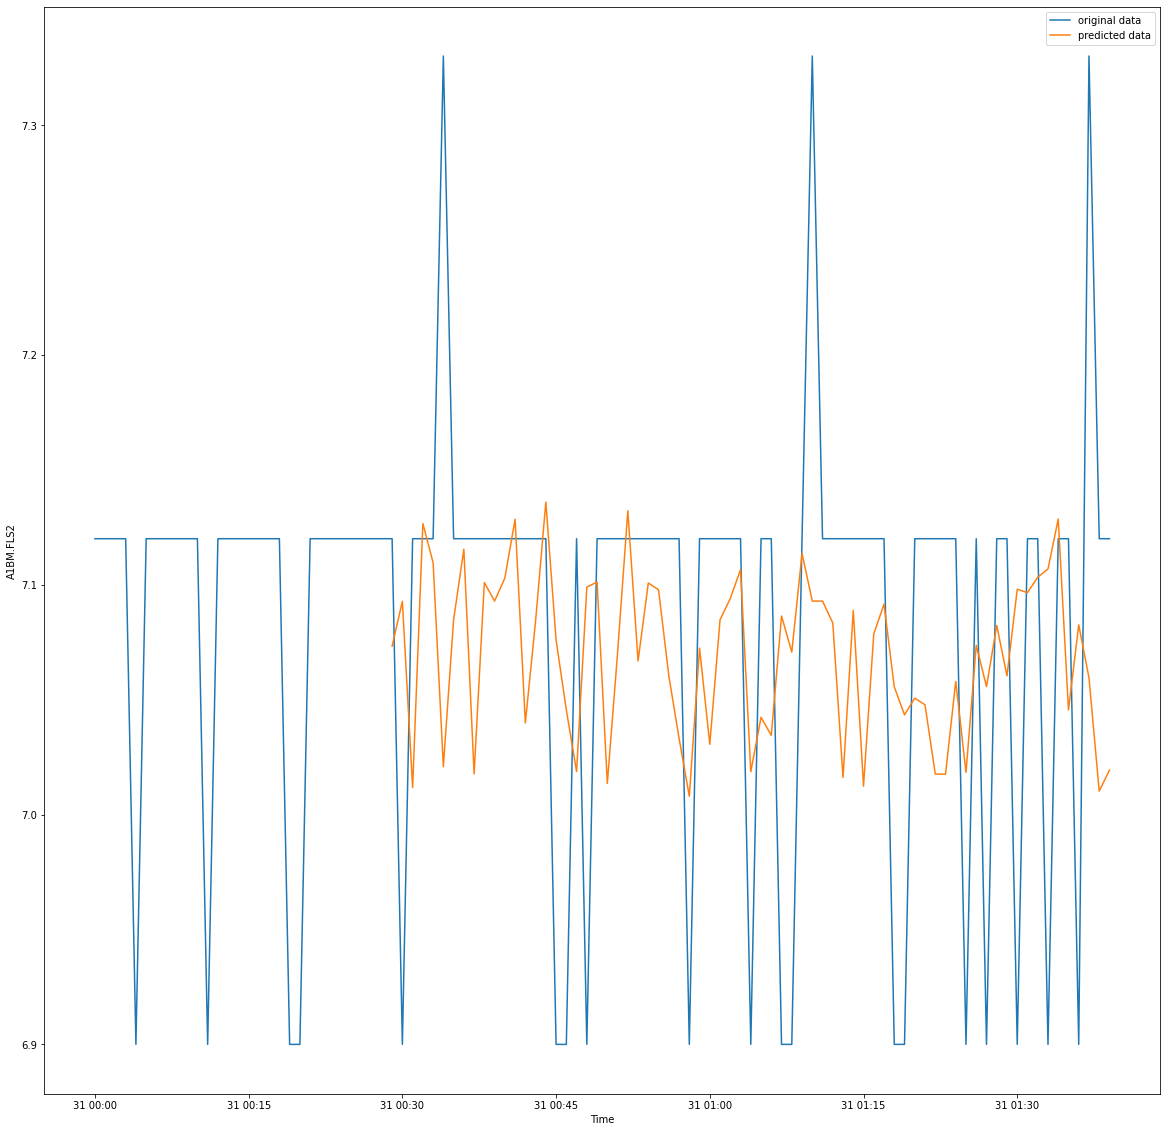

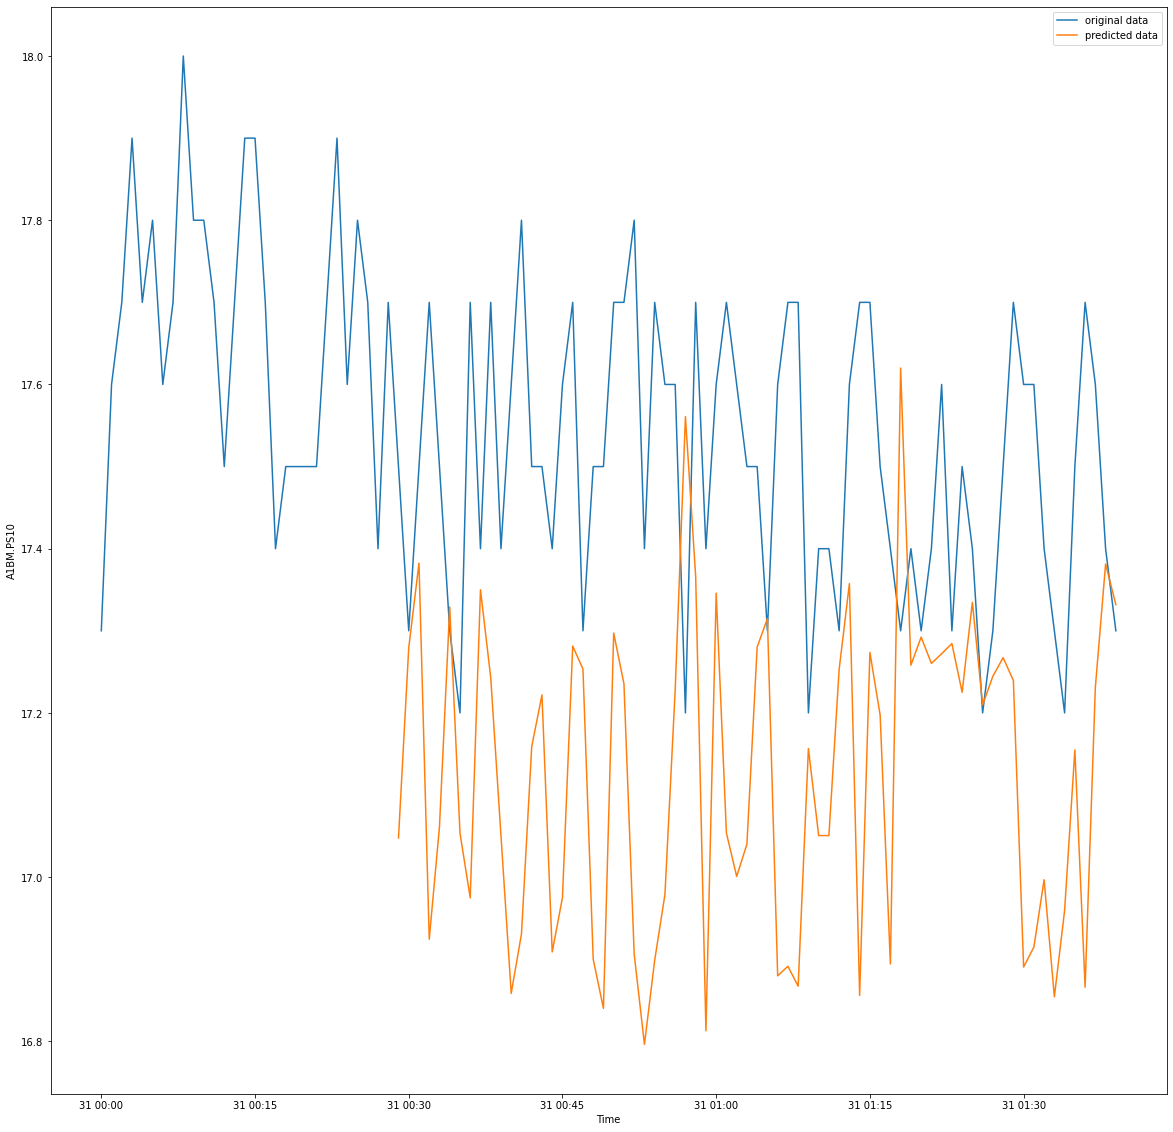

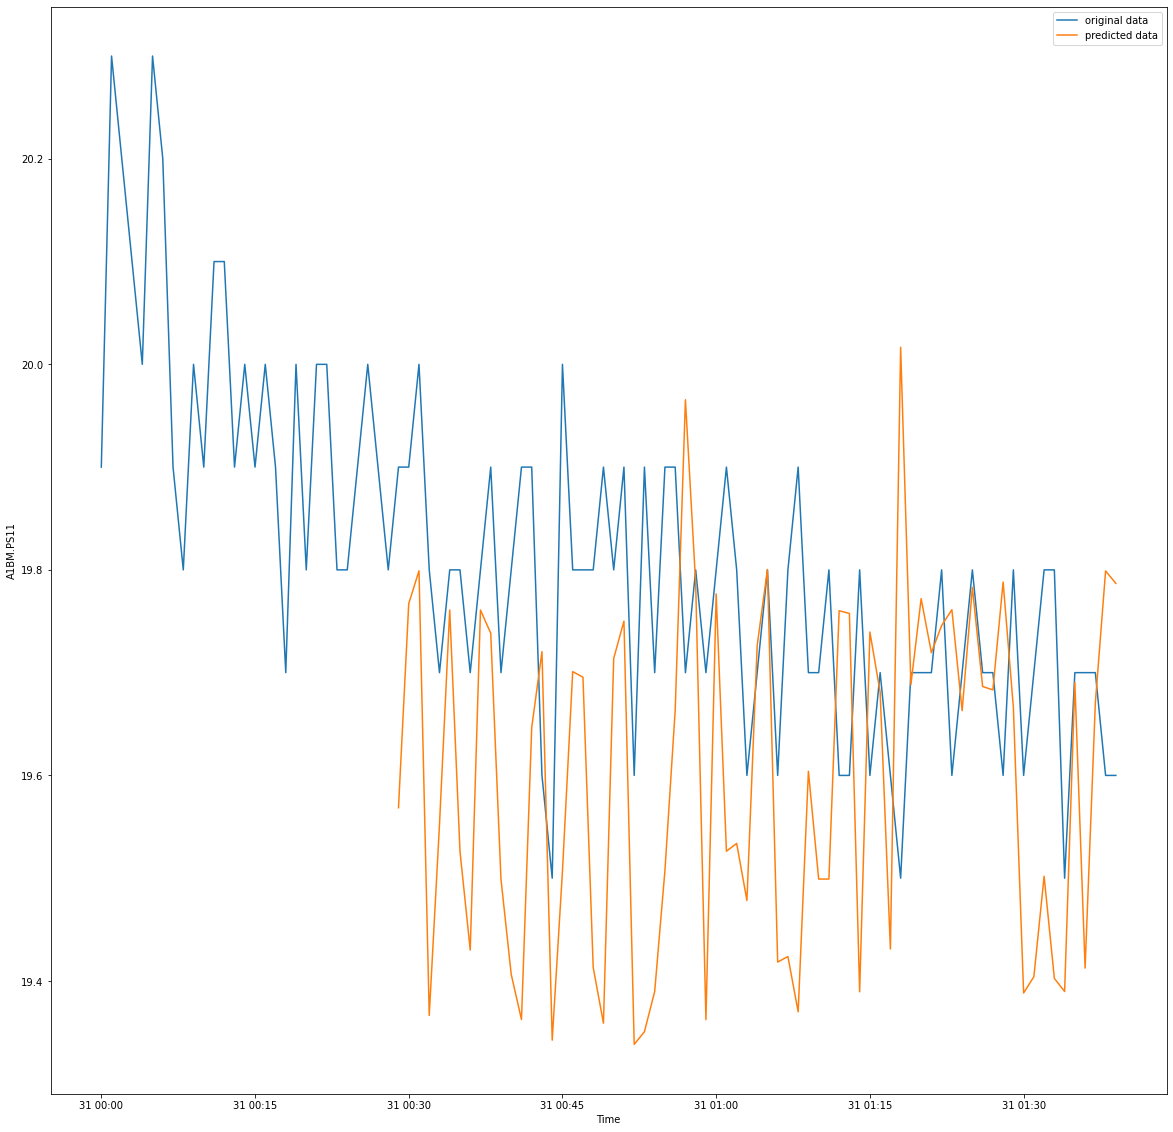

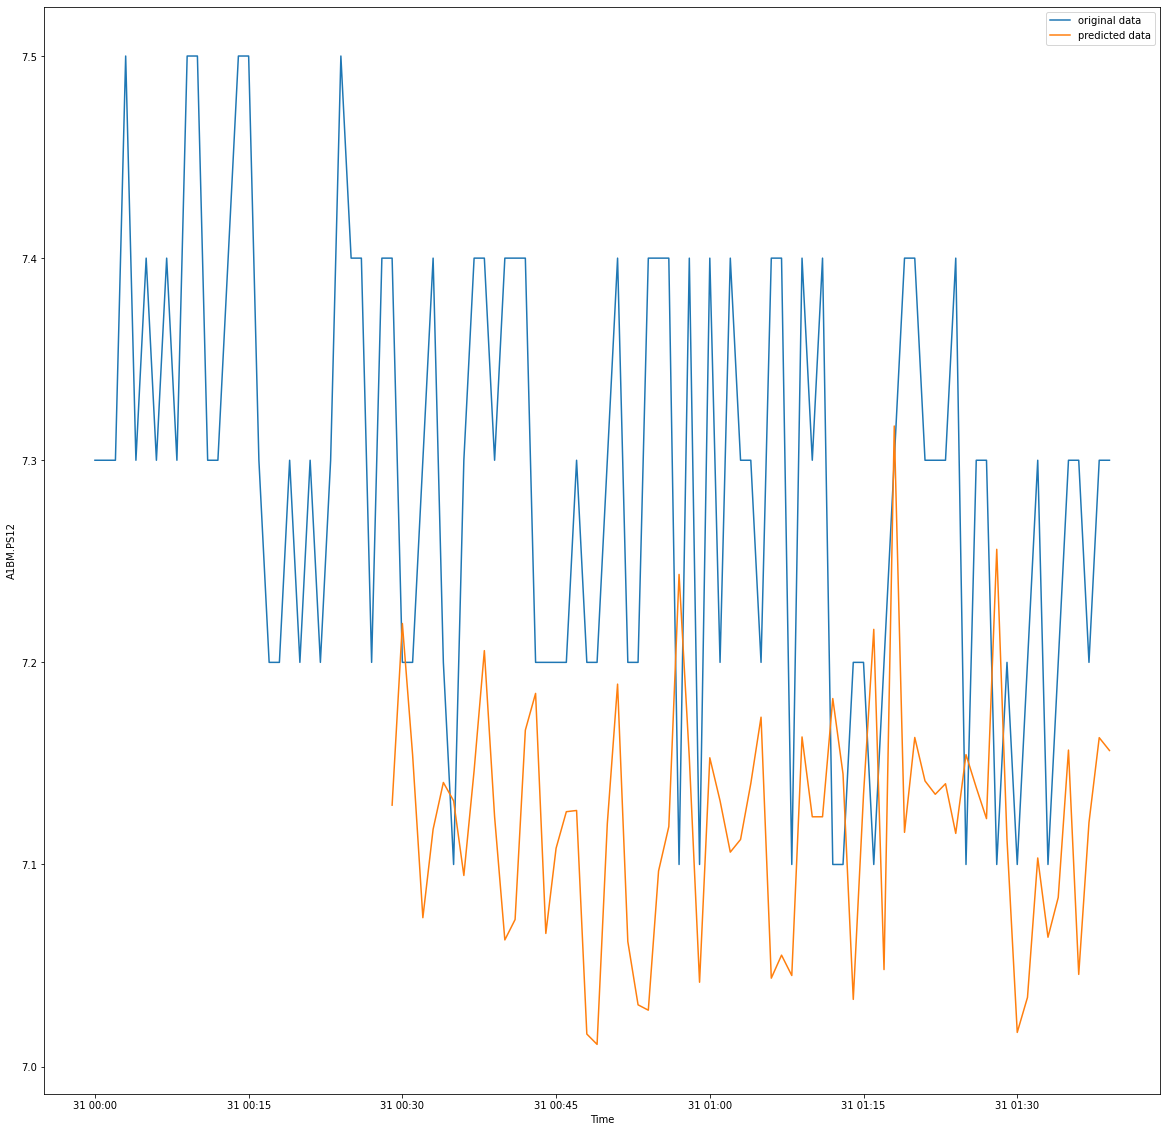

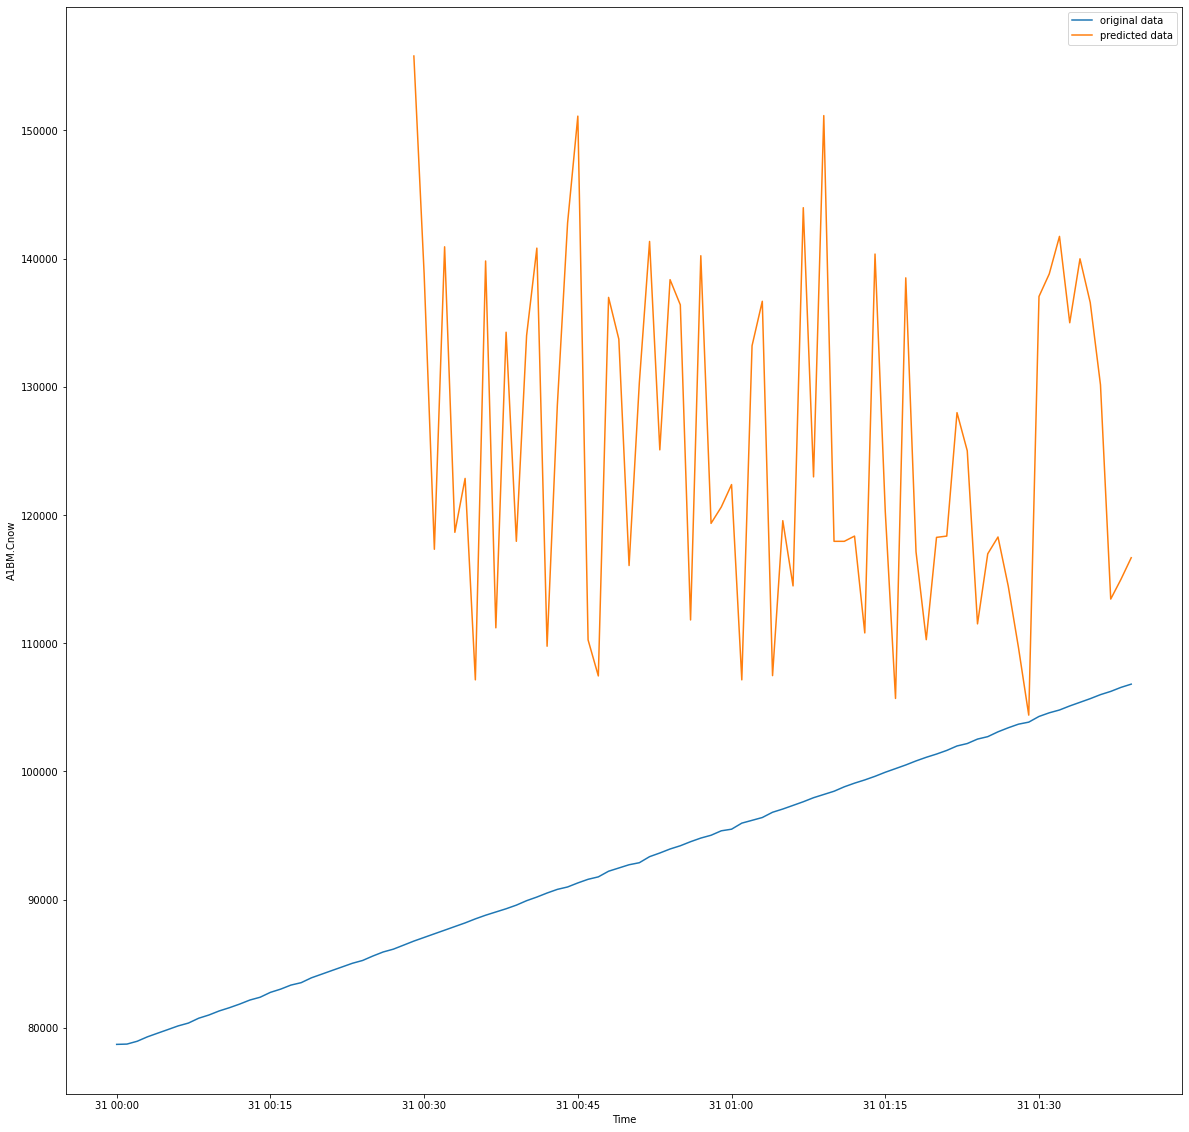

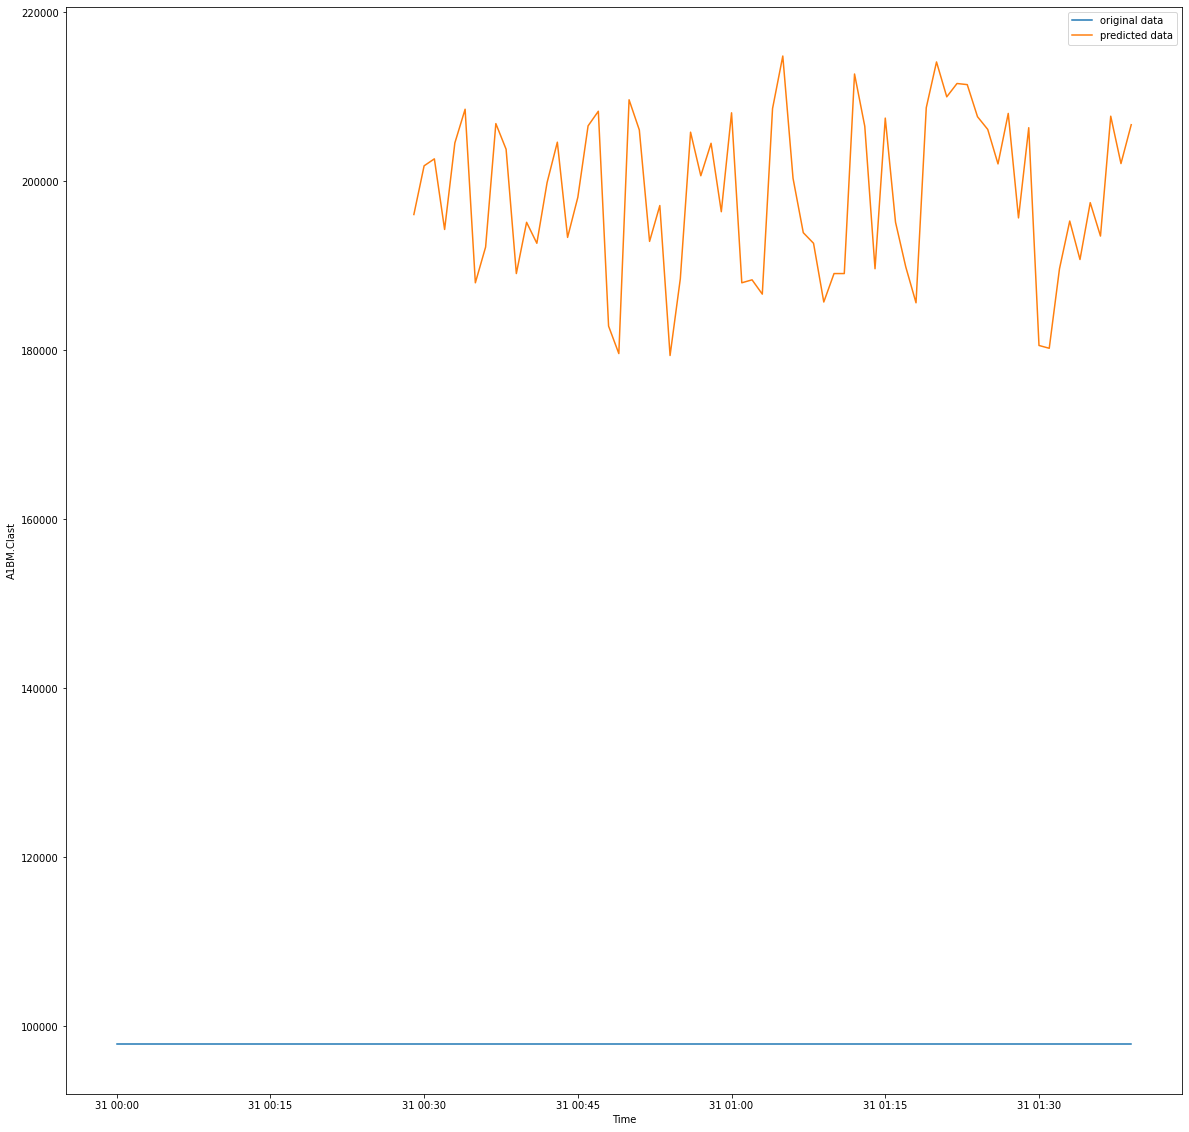

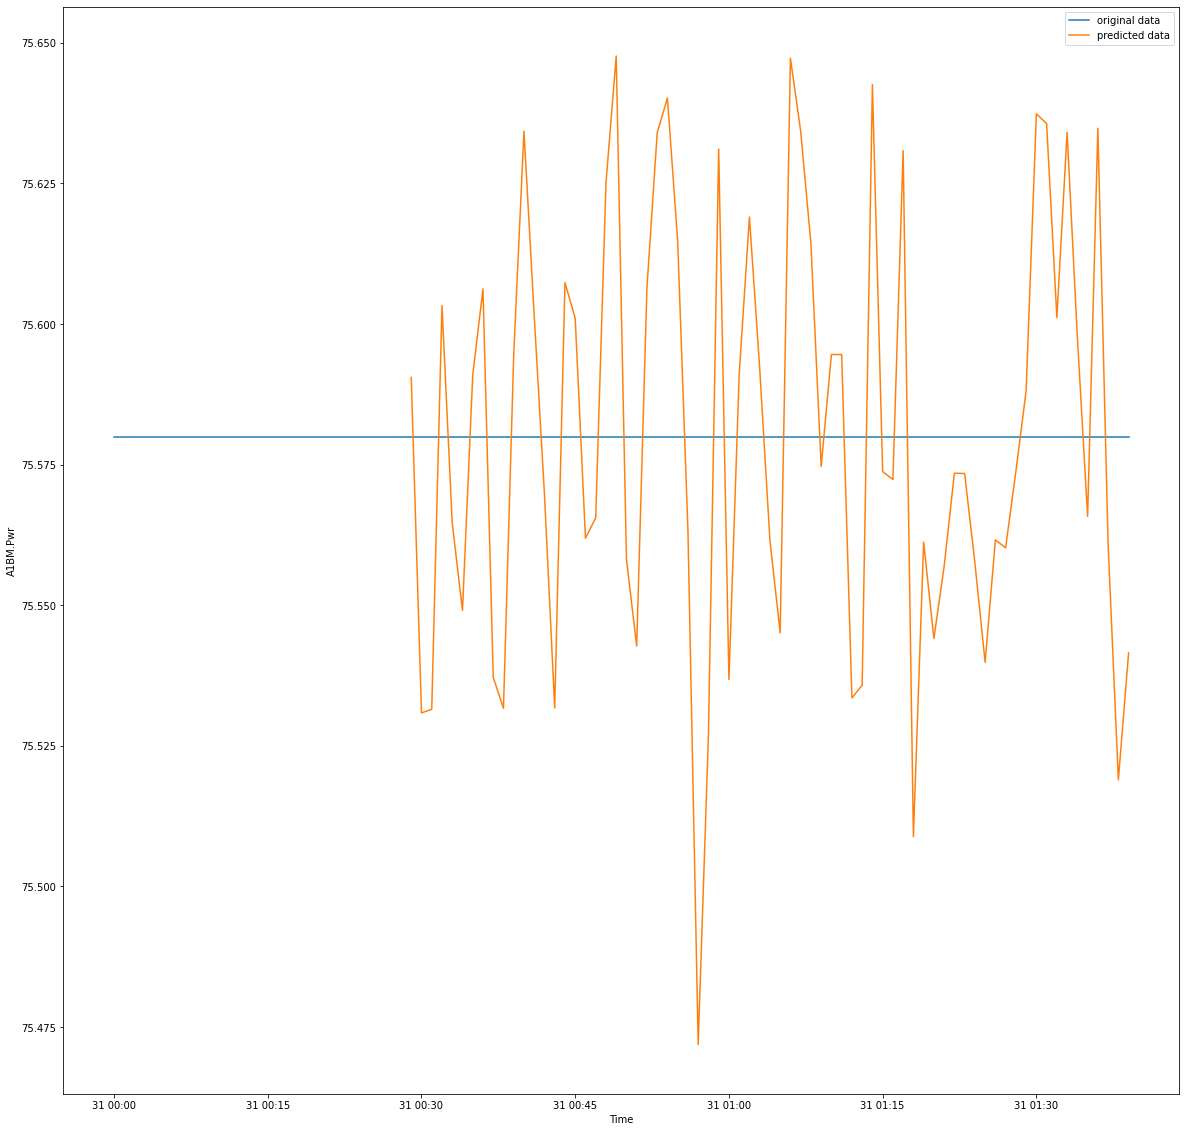

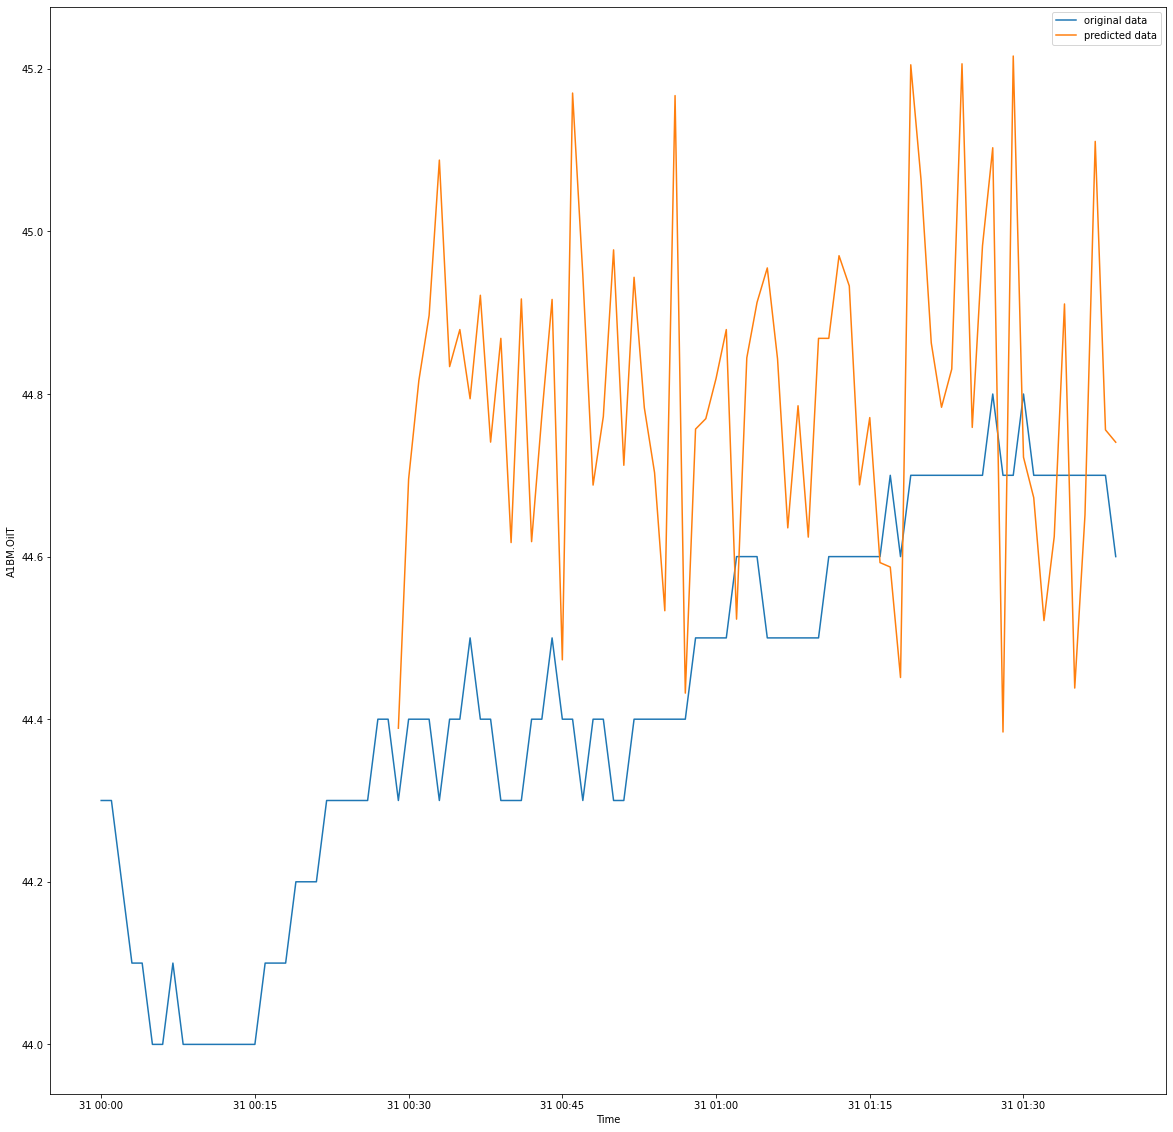

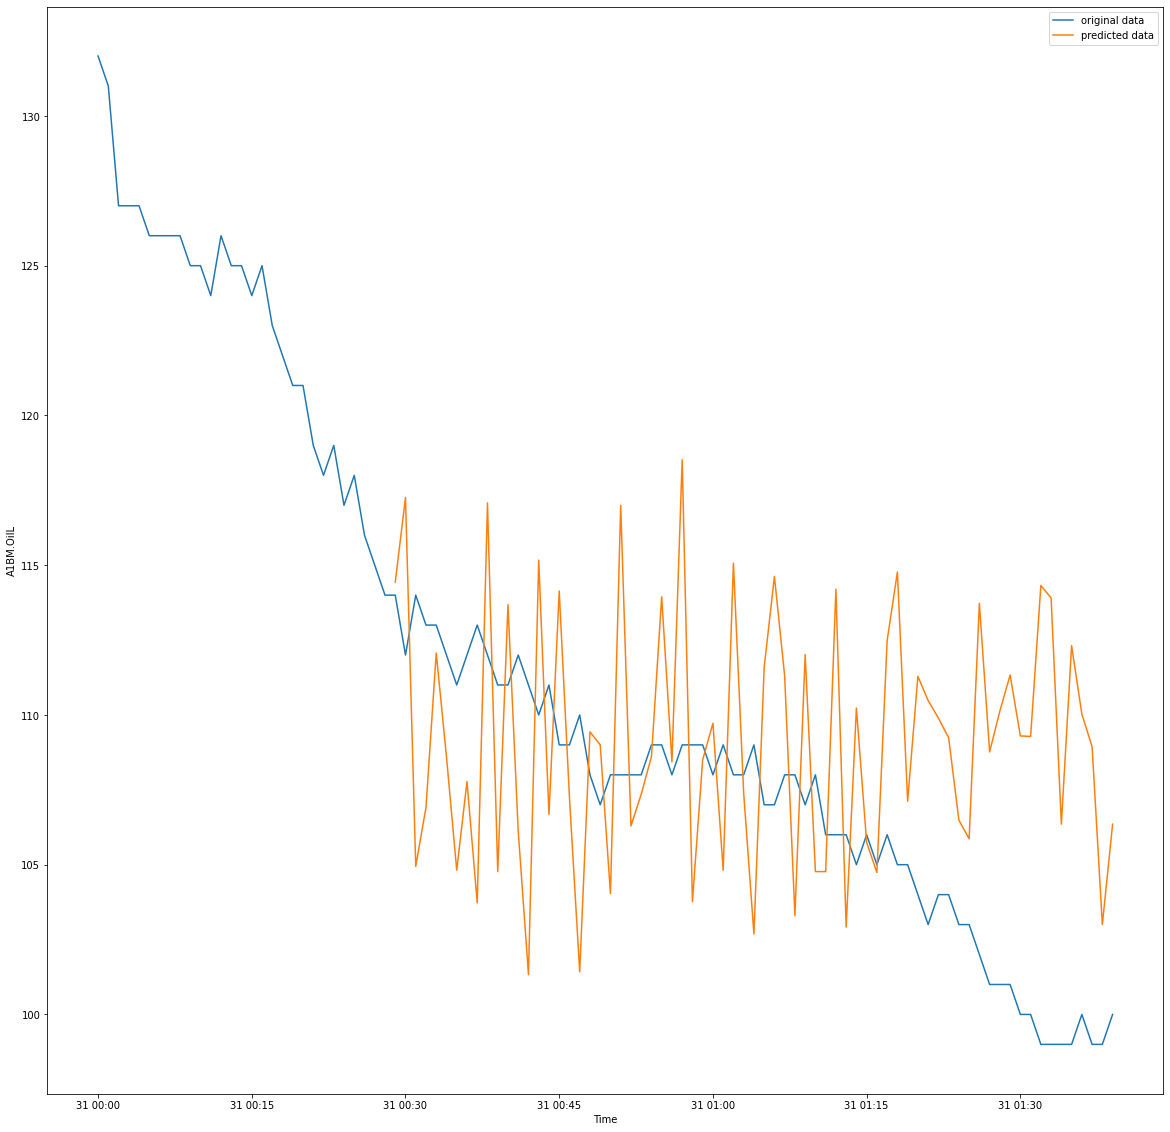

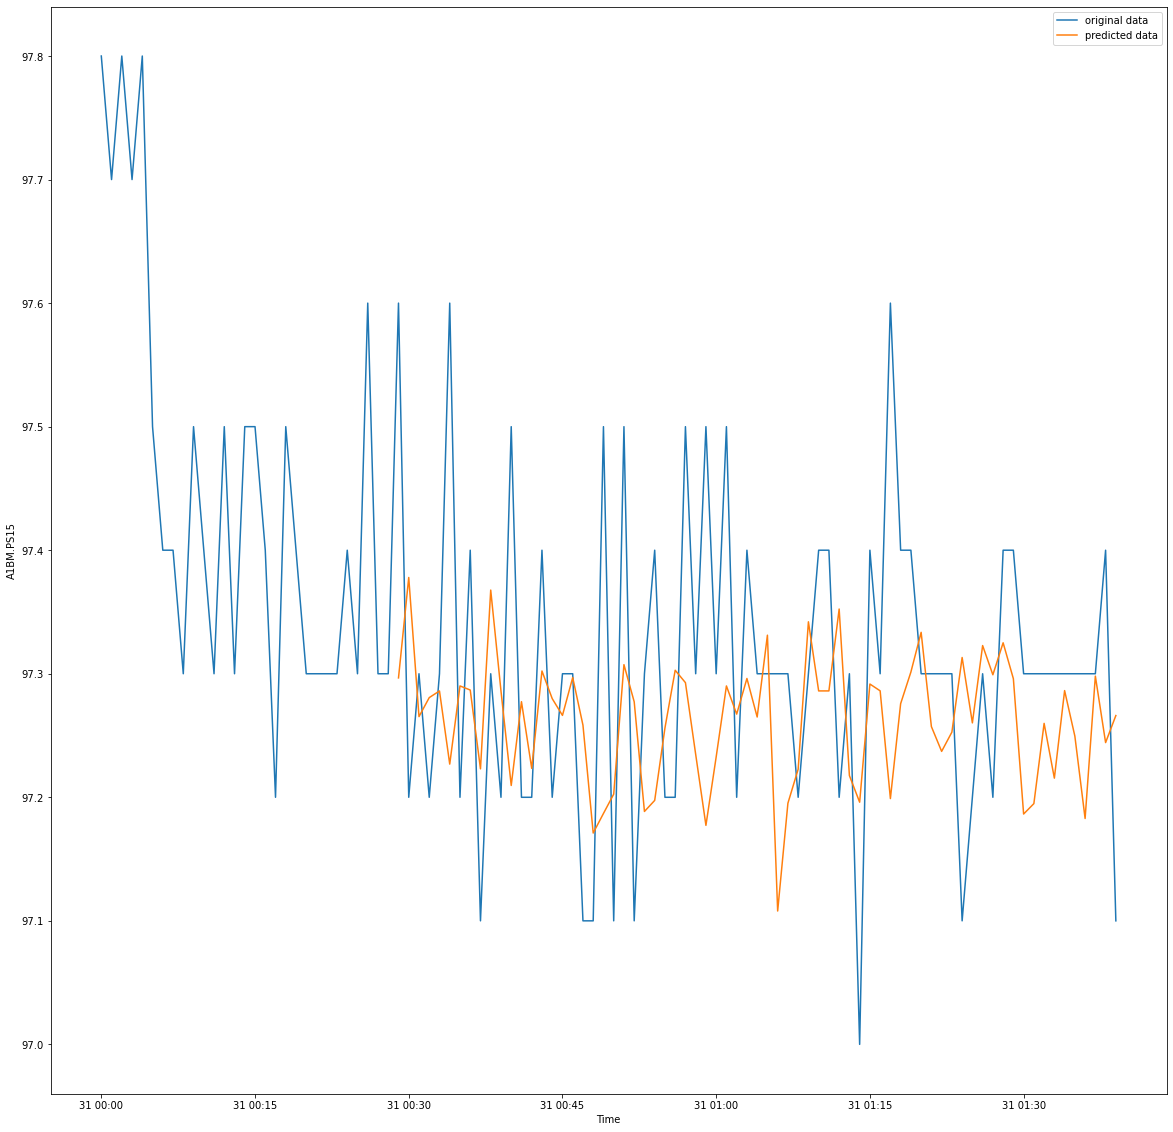

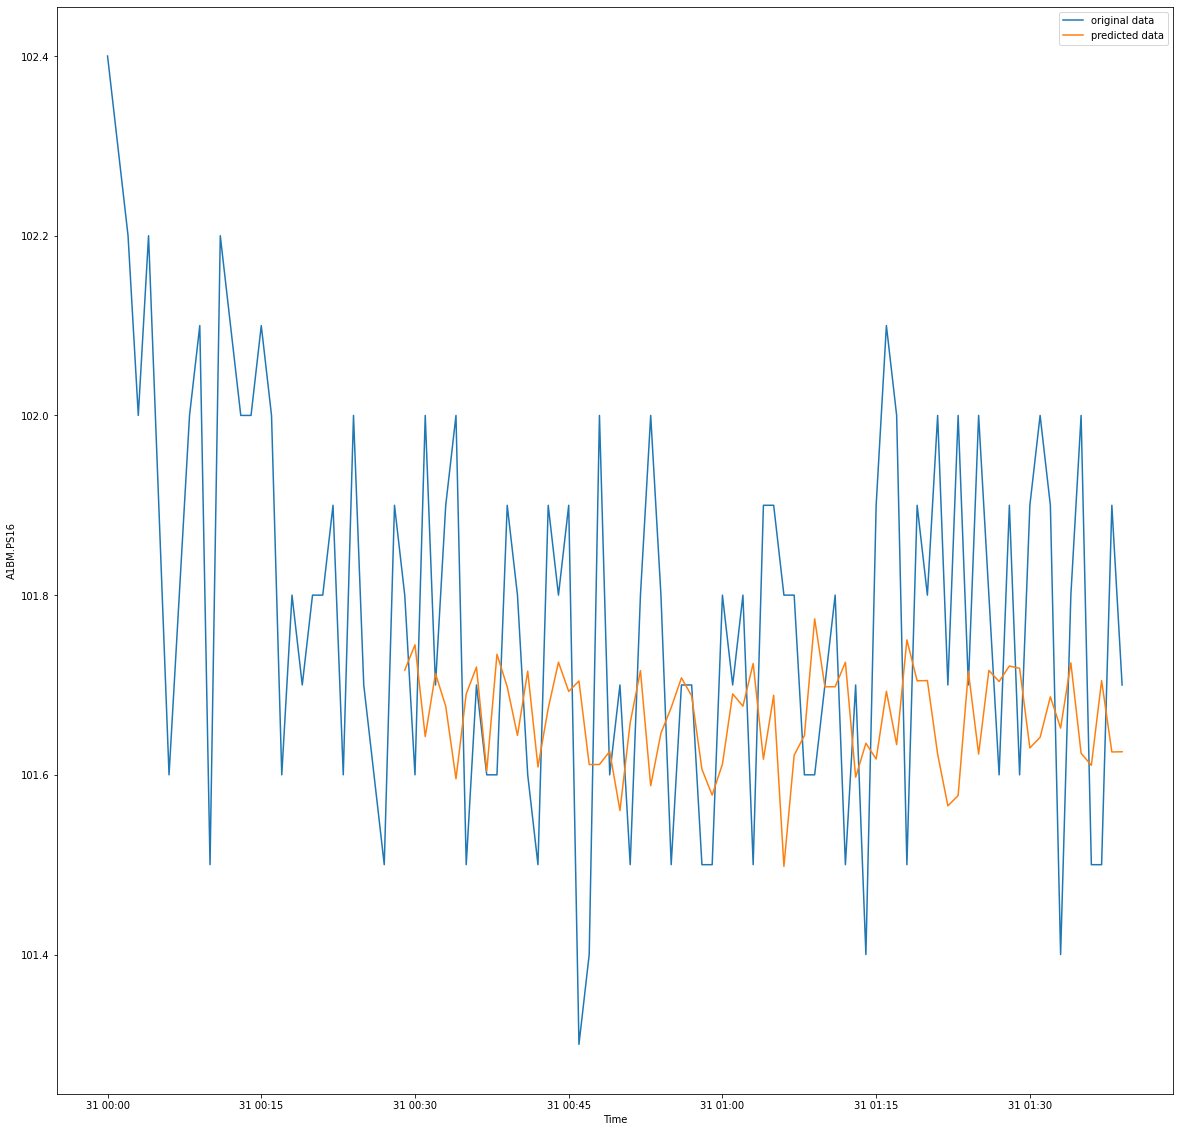

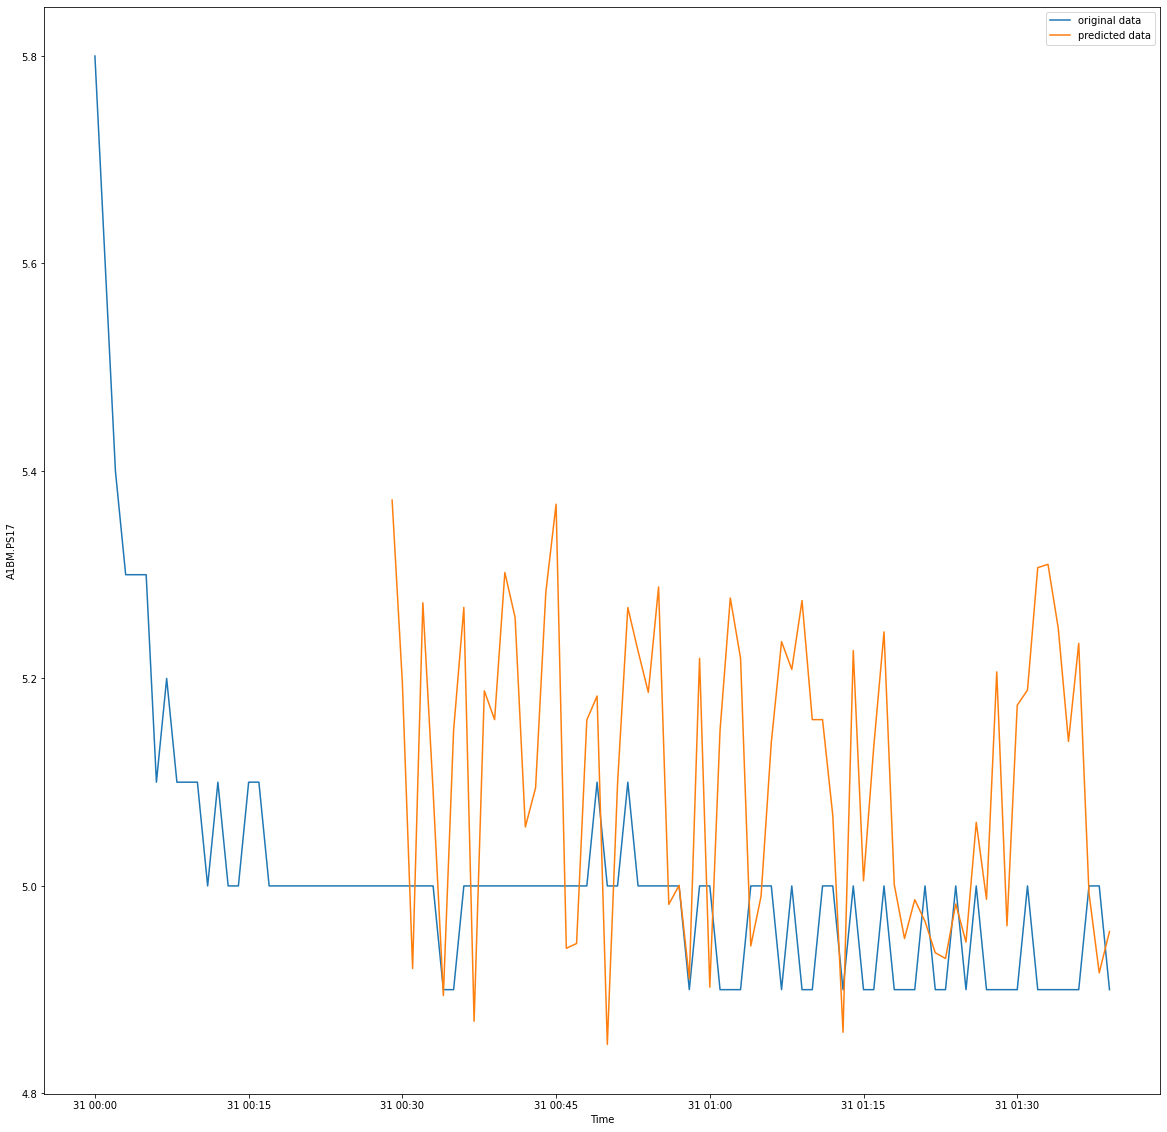

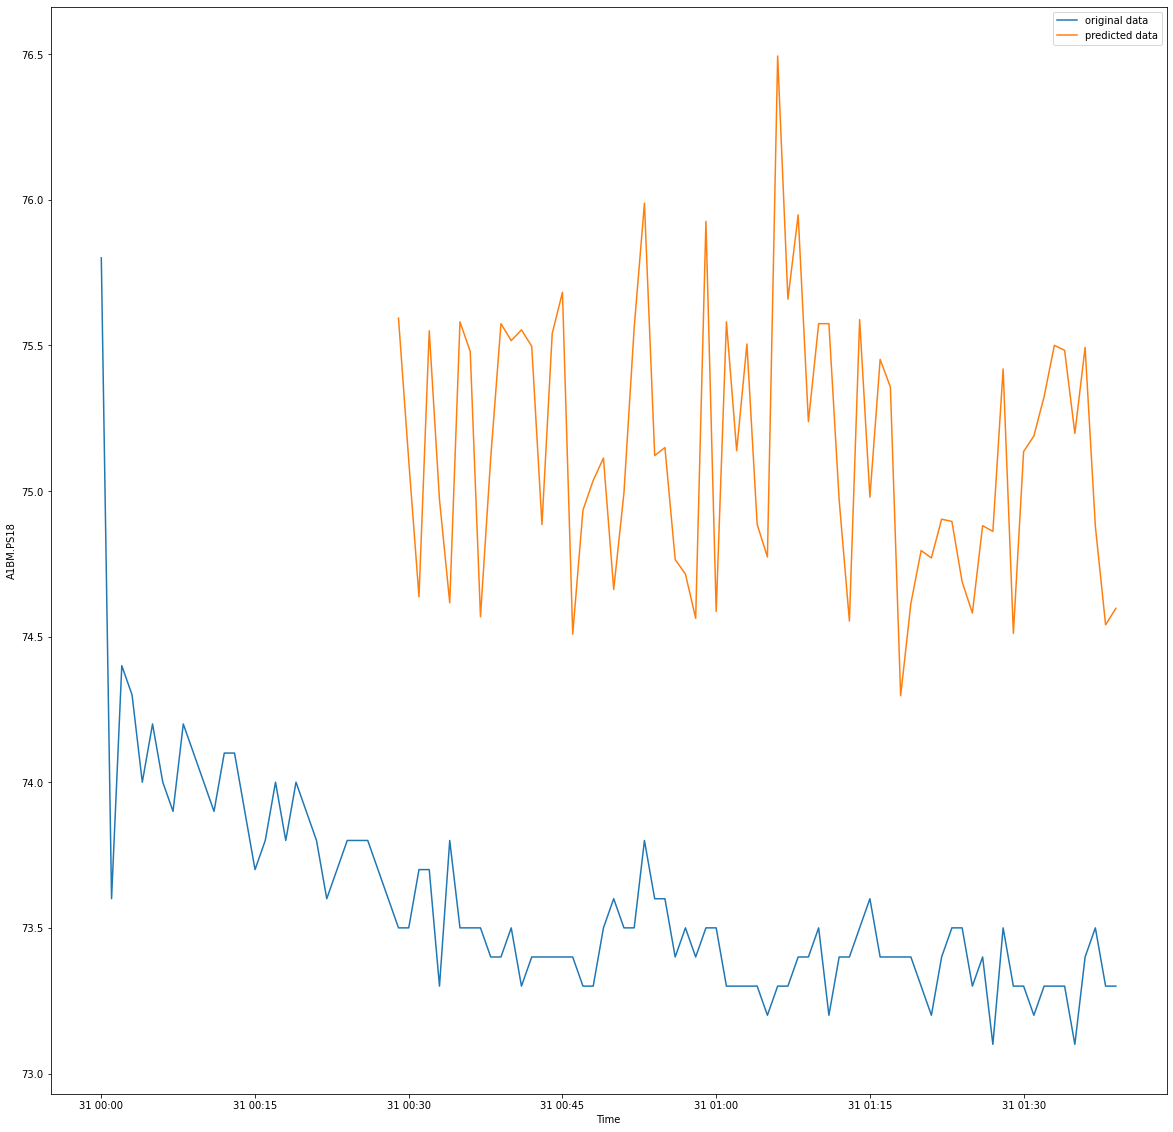

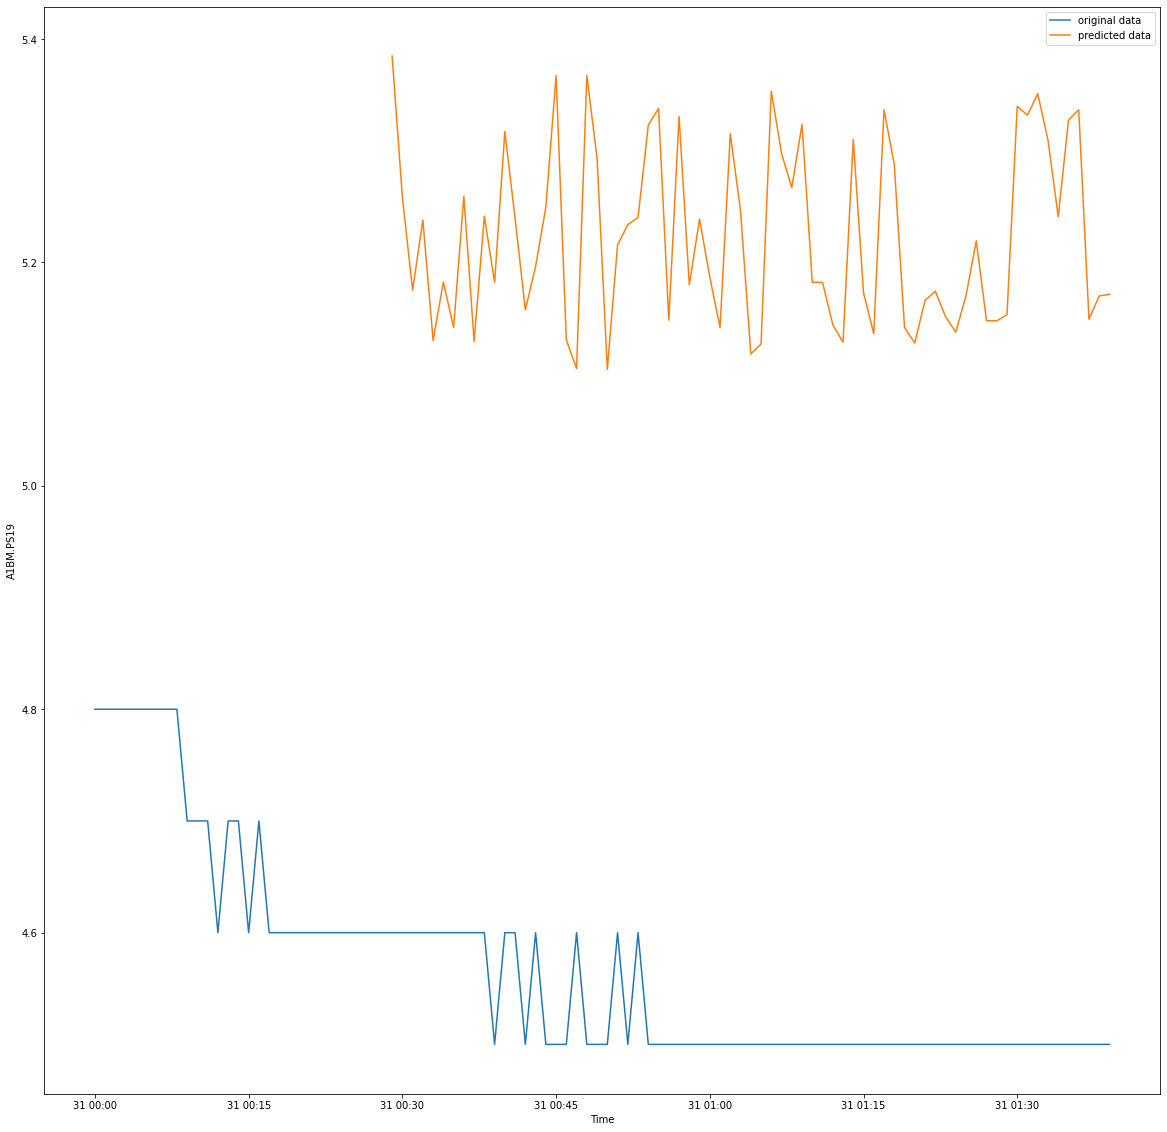

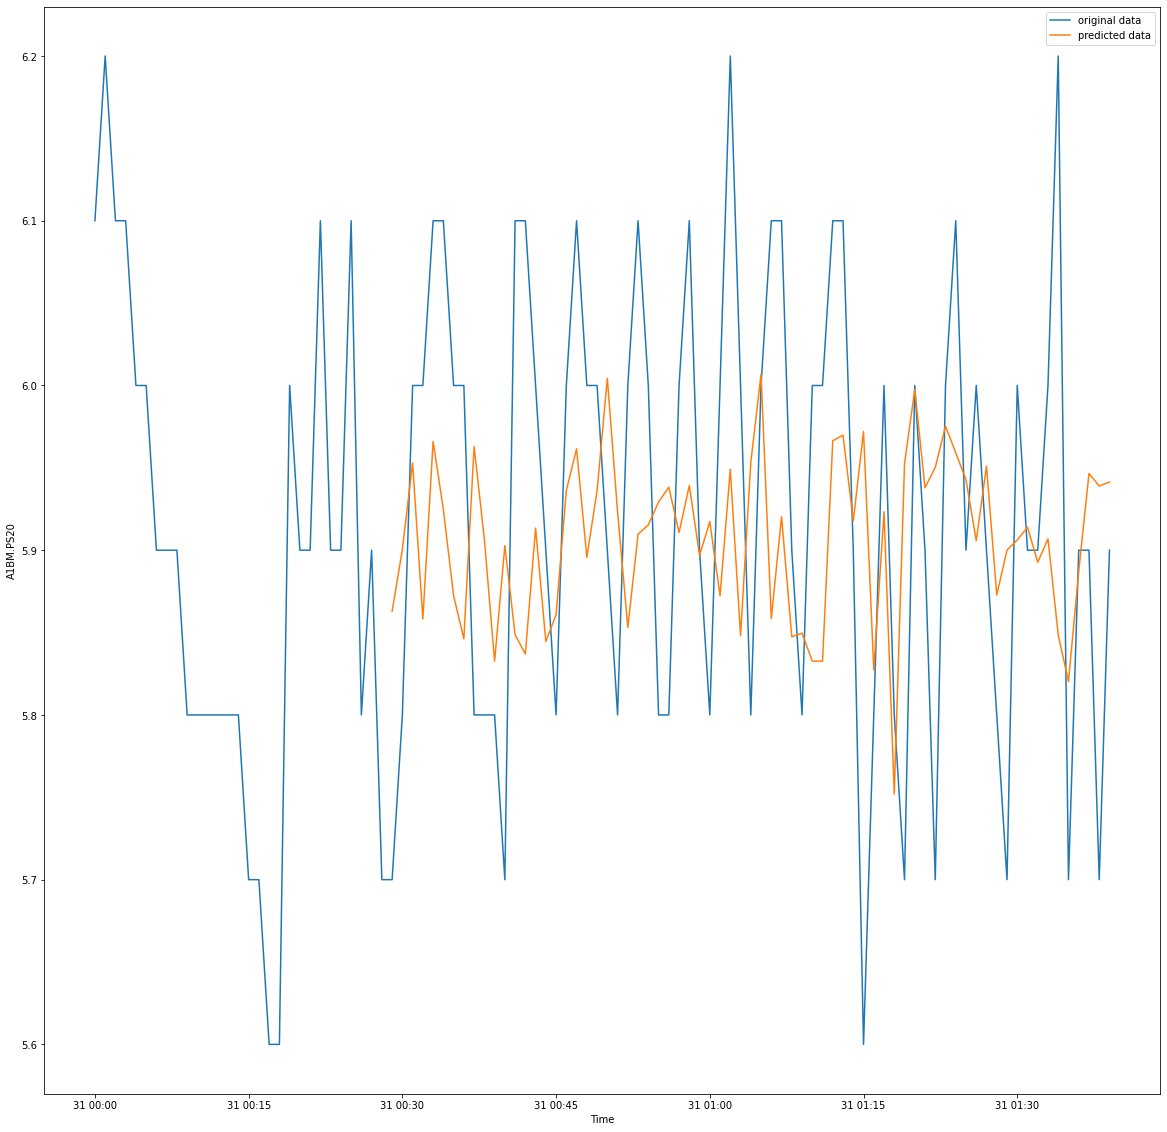

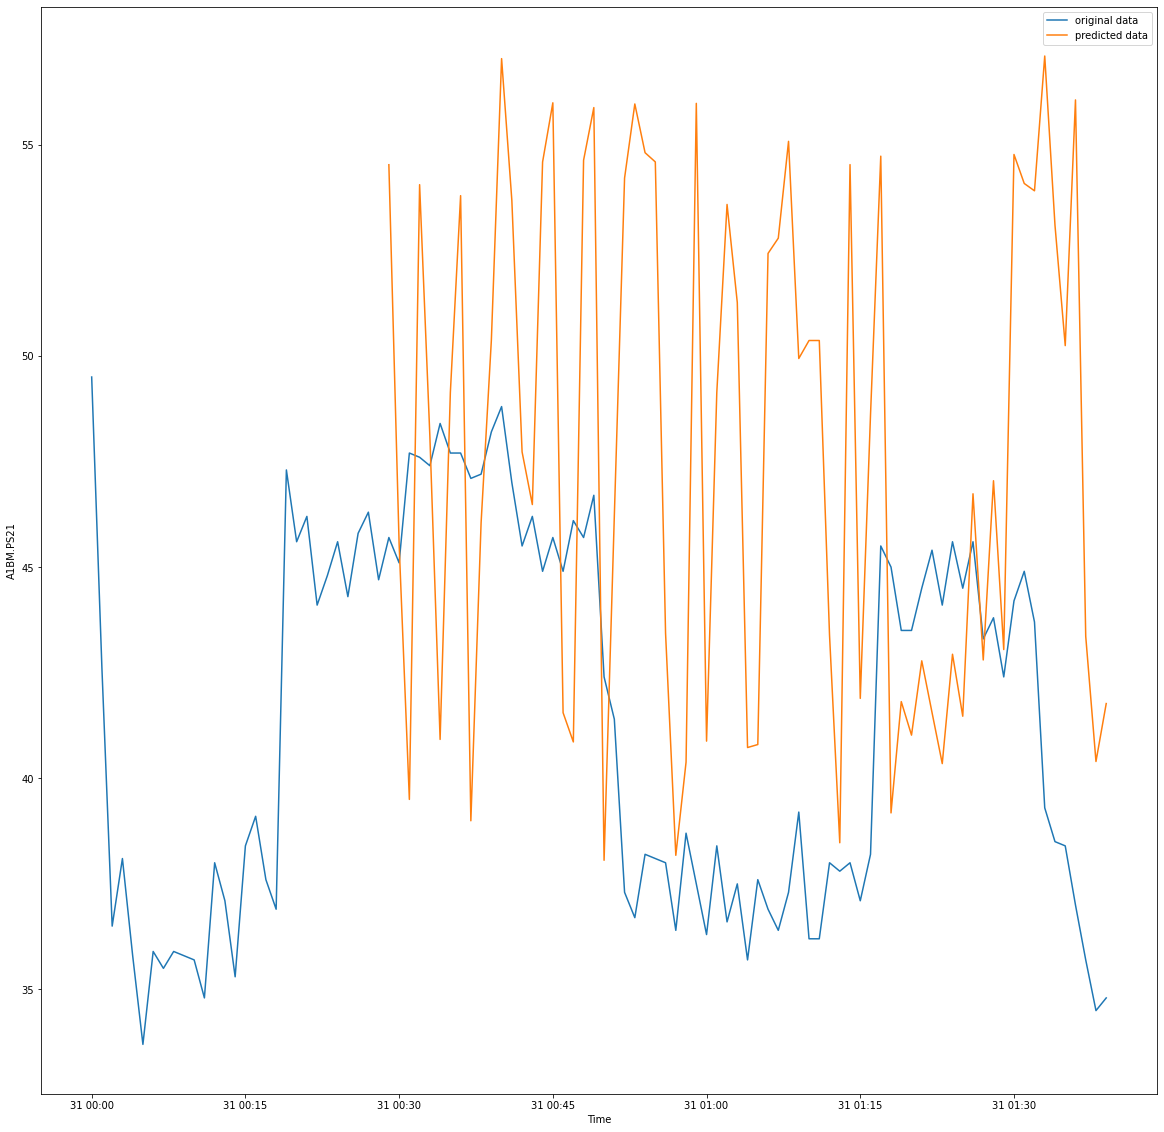

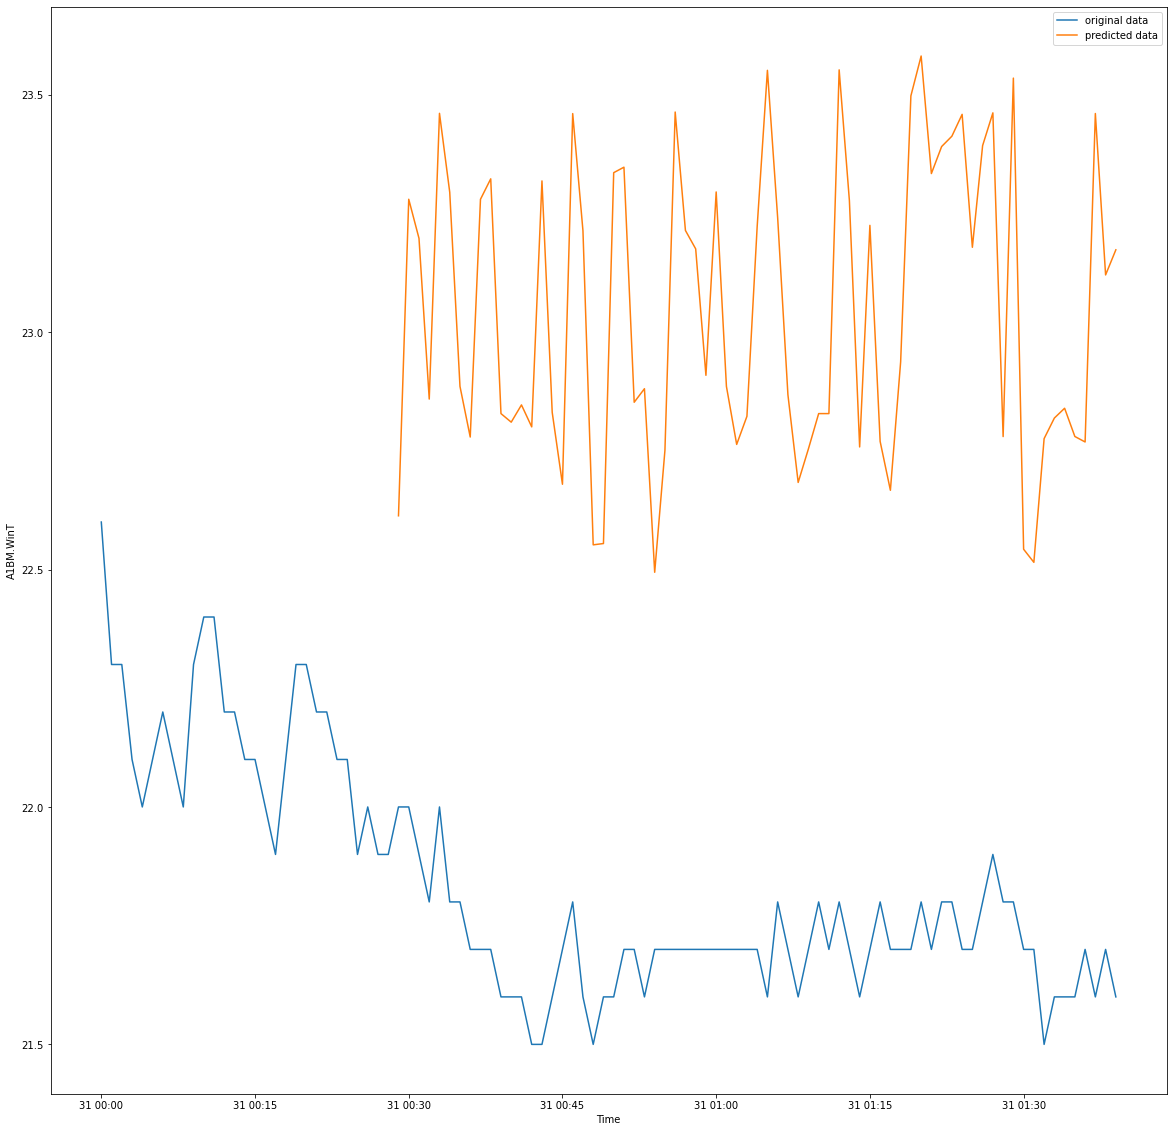

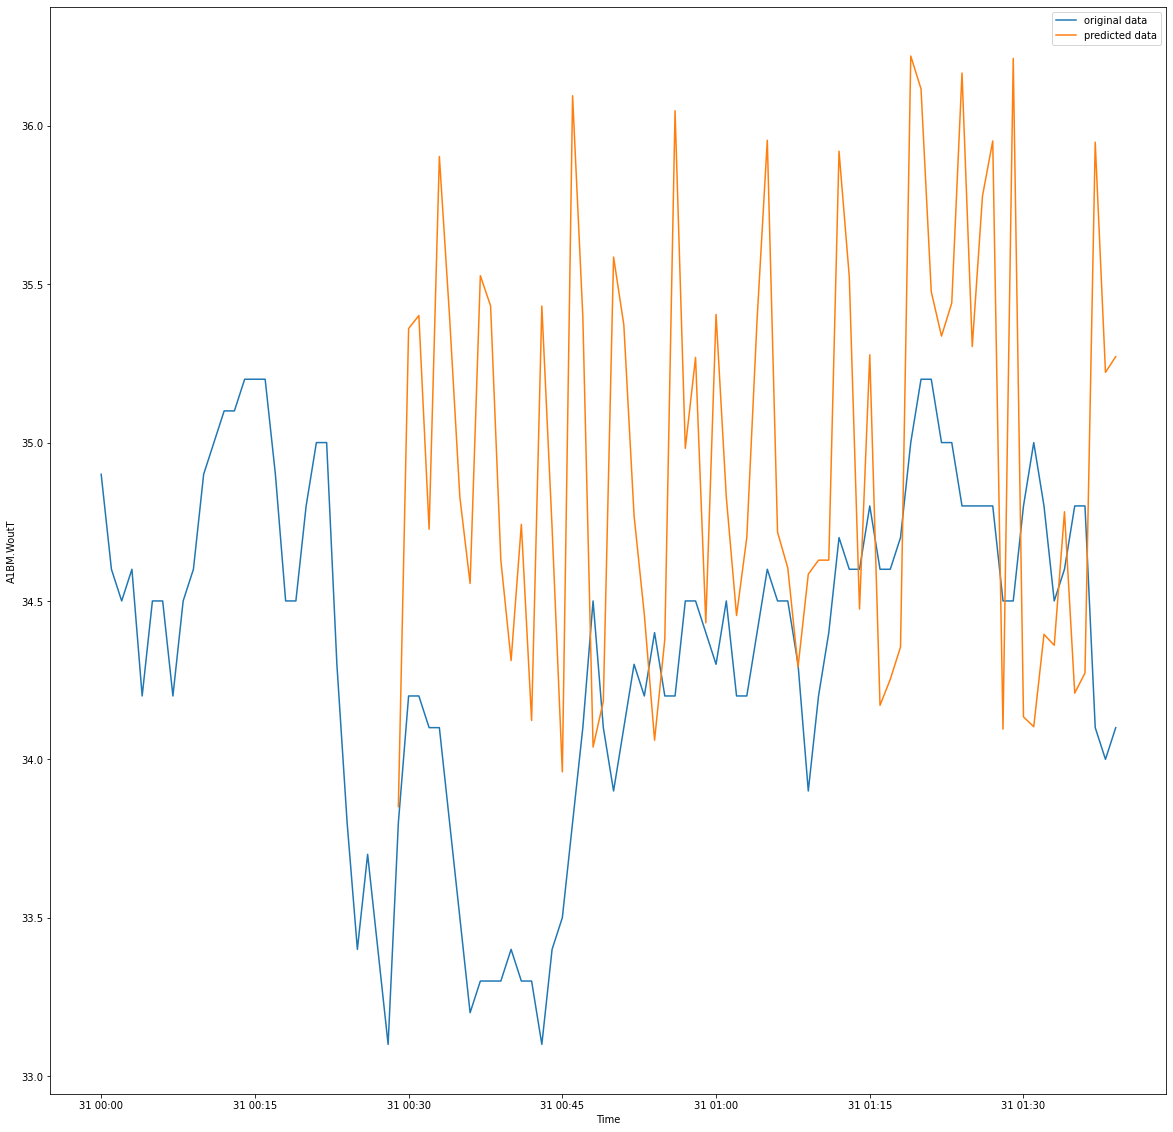

In [117]:
for j in range(len(x)):
    t = []
    arr=np.full((100-len(pp),1),np.nan)
    t.append(np.concatenate((arr, pp[:,j].reshape(-1,1)), axis=0).reshape(-1,1))
    plt.figure(figsize=(20,20))
    plt.plot(df['DateTime'][:100], df[x[j]][:100].replace(0,df[x[j]].mean()) , label='original data')
    plt.plot(df['DateTime'][:100], np.array(t).reshape(-1,1), label='predicted data')
    plt.xlabel('Time')
    plt.ylabel(x[j])
    plt.legend()
    plt.savefig(f"./1/{x[j]}_{j}.png")

## 2

In [240]:
p = np.array(pd.read_csv("p_1_2.csv", header=None).values)
pp = np.array(pd.read_csv("pp_1_2.csv", header=None).values)

In [191]:
y_test.shape

(71, 2, 19)

In [194]:
pred_v = []
true_v = []
for i in range(len(y_test[:,1,0])):
    true_v.append(0)
    if y_test[:,0,0][i] == 0:
        if 0.1 > (np.abs(y_test[:,0,1][i]-(pp[:,1][i]))/y_test[:,0,1].mean()):
            pred_v.append(0)
        else:
            pred_v.append(1)

    else:
        if 0.1 > (np.abs(y_test[:,0,1][i]-(pp[:,1][i]))/y_test[:,0,1][i]):
            pred_v.append(0)
        else:
            pred_v.append(1)

In [195]:
sum(pred_v)

2

In [196]:
accuracy_score(true_v,pred_v)

0.971830985915493

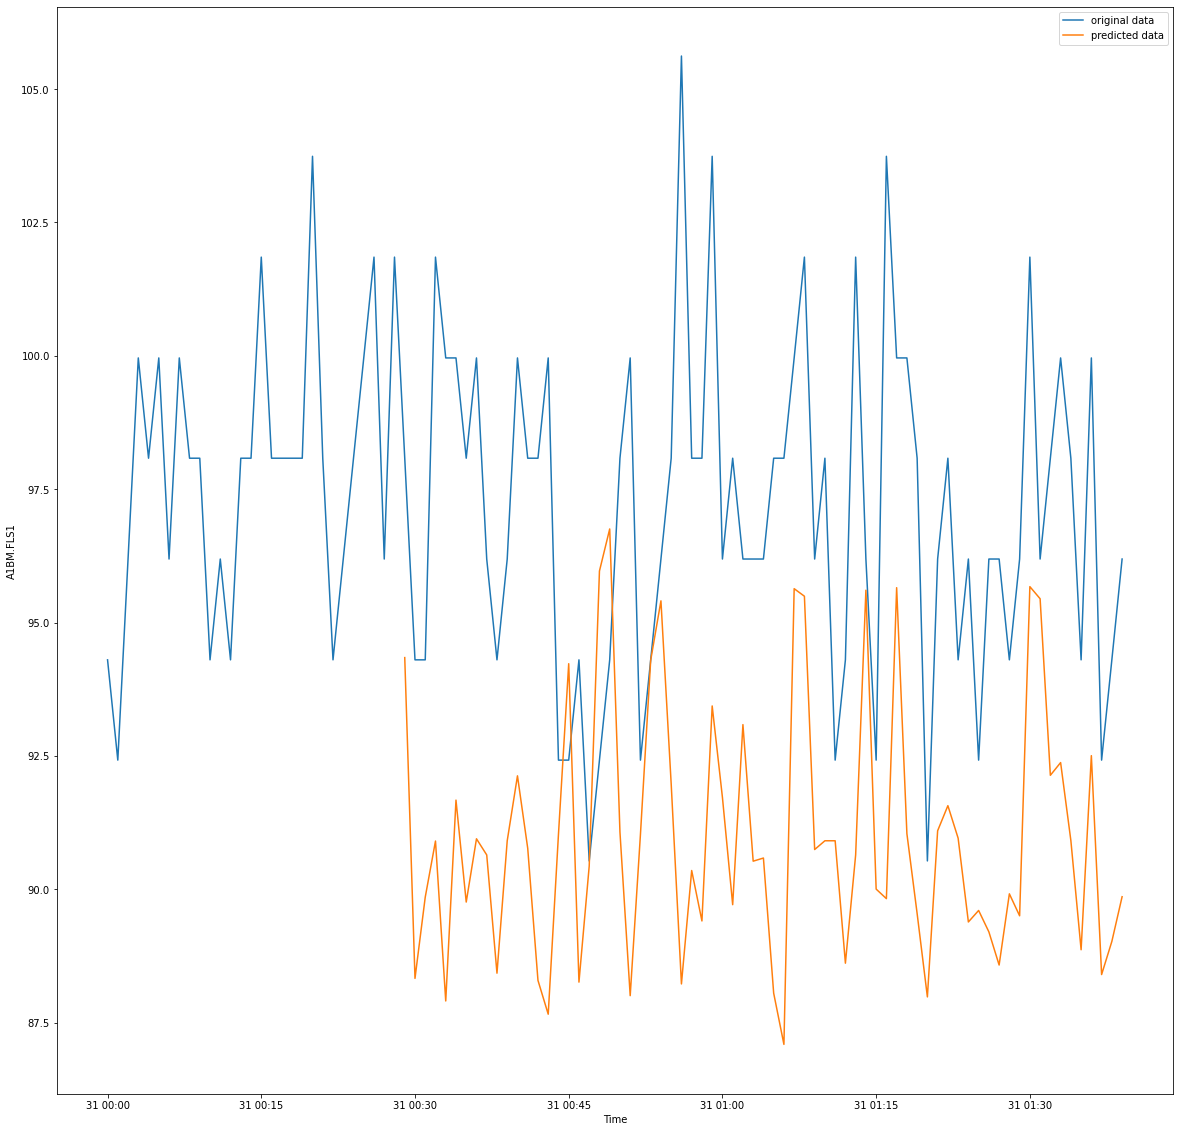

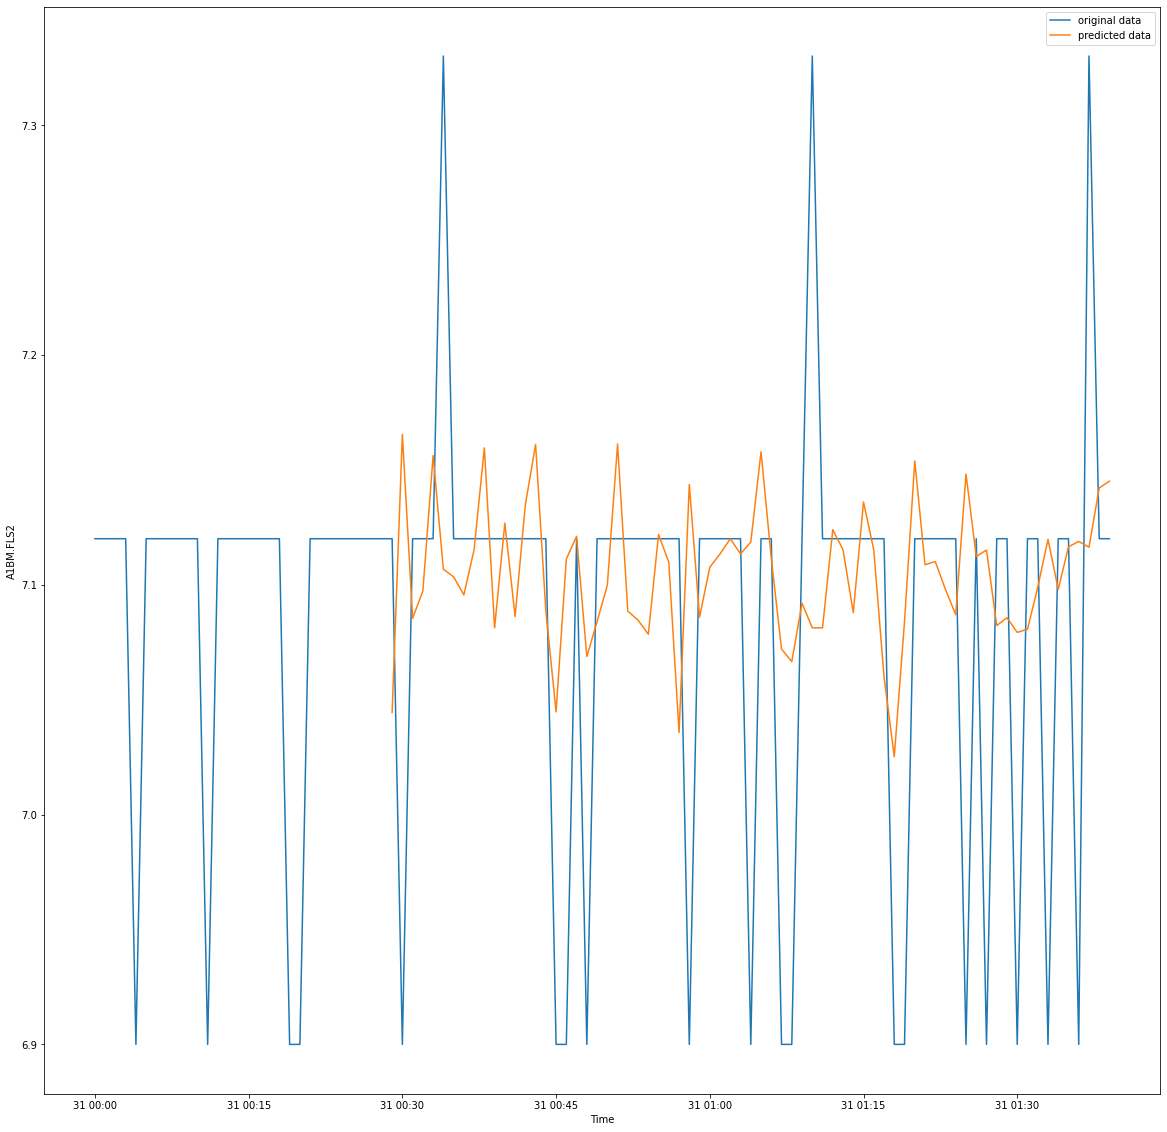

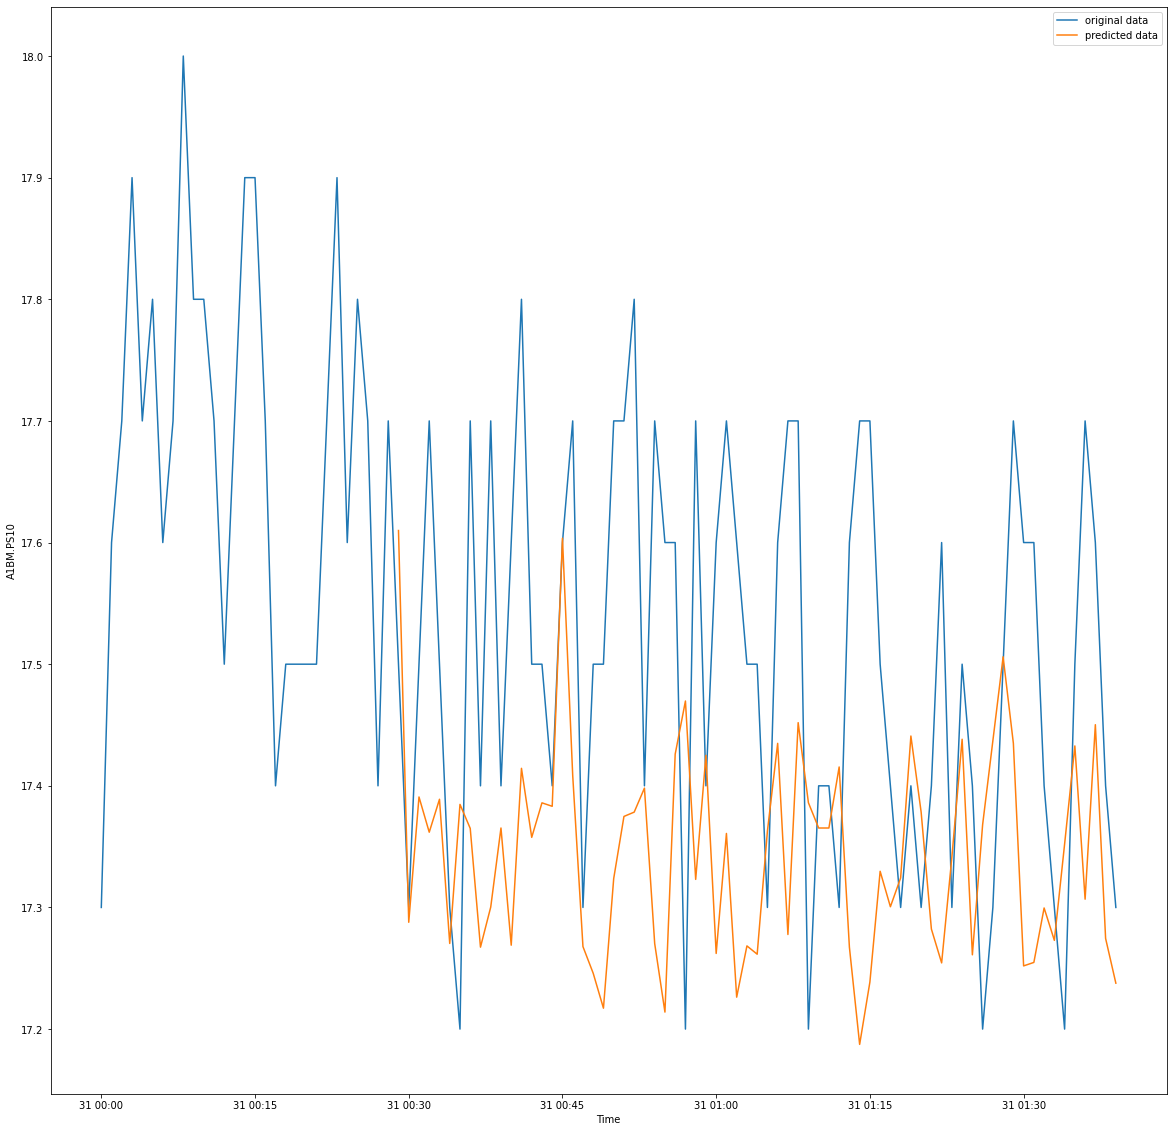

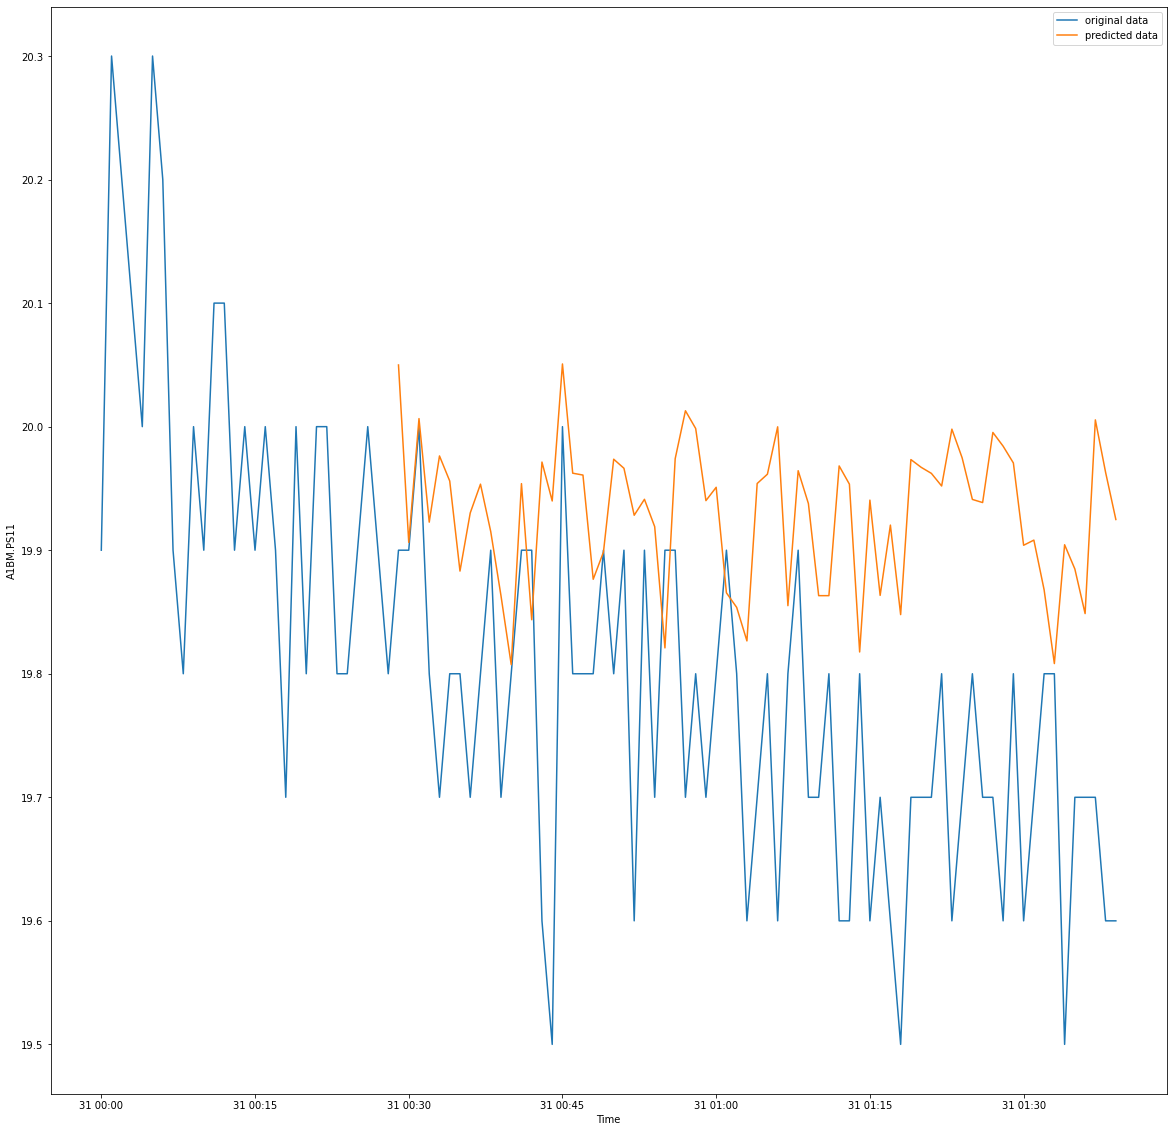

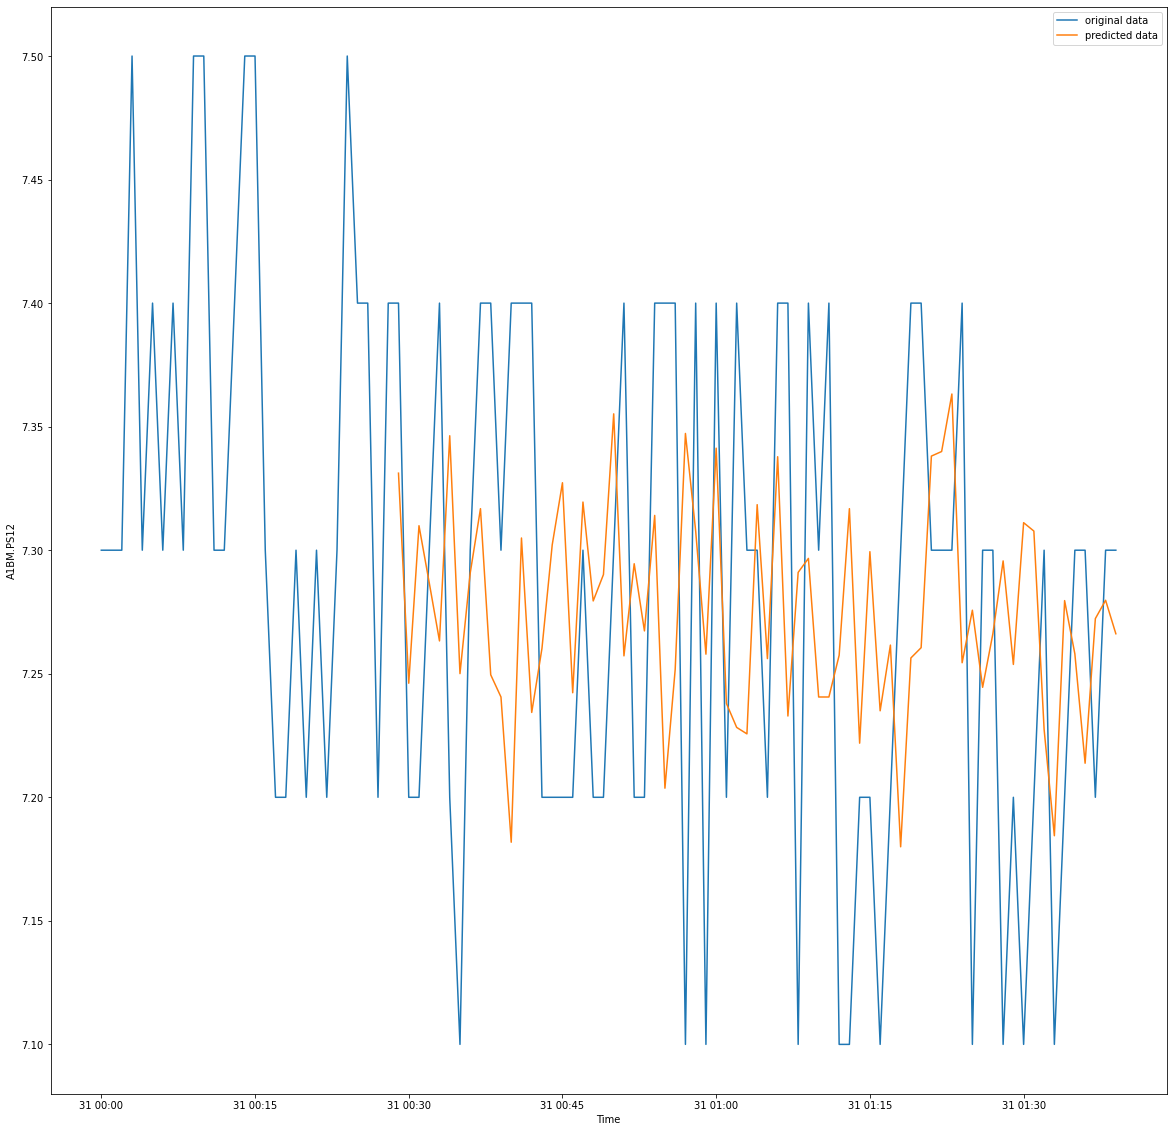

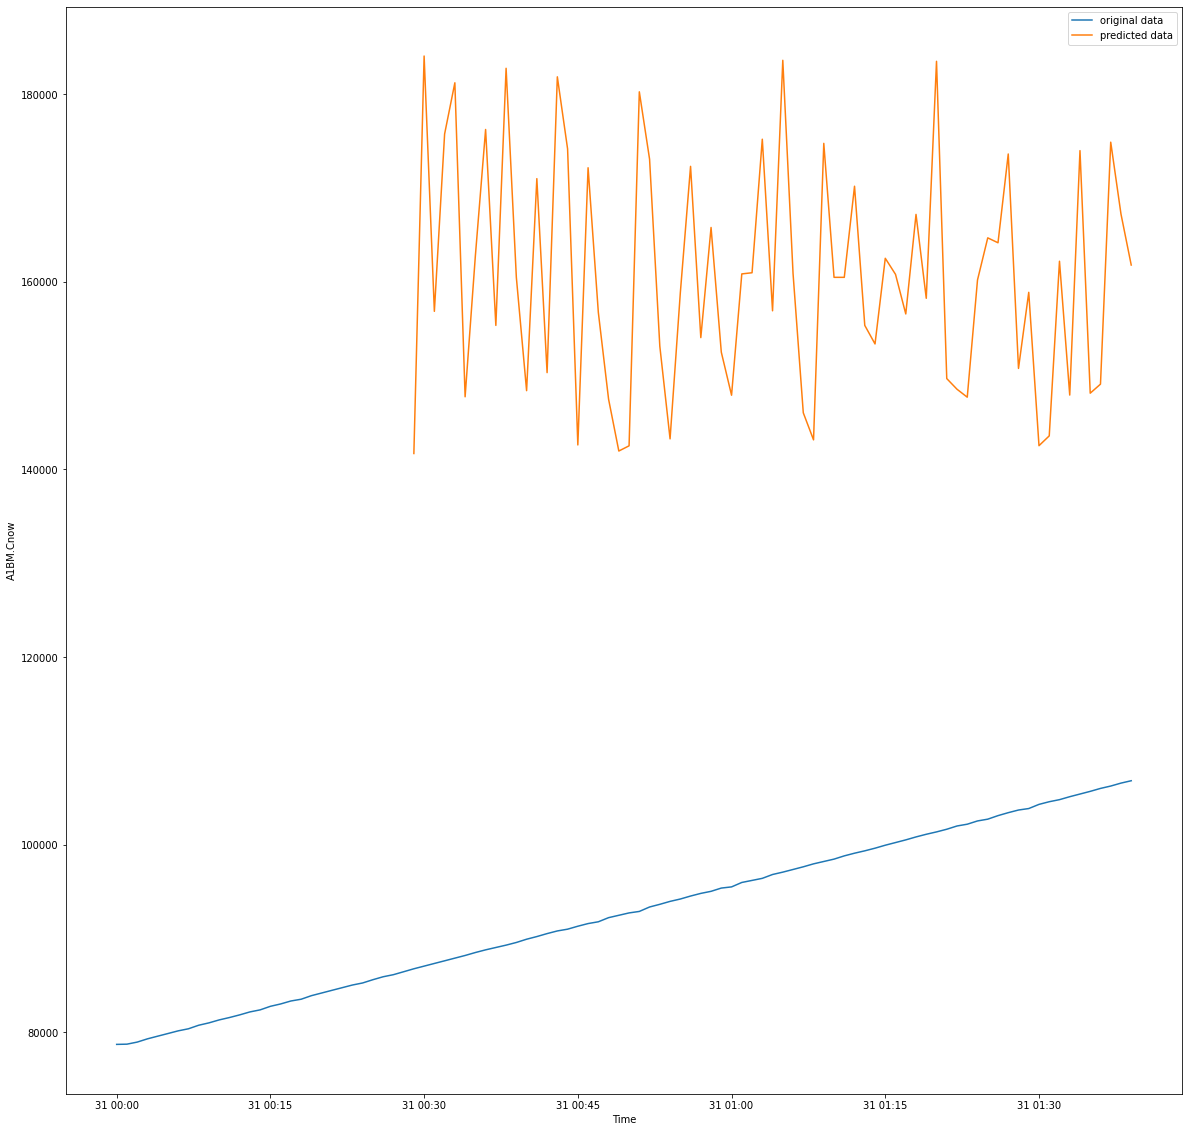

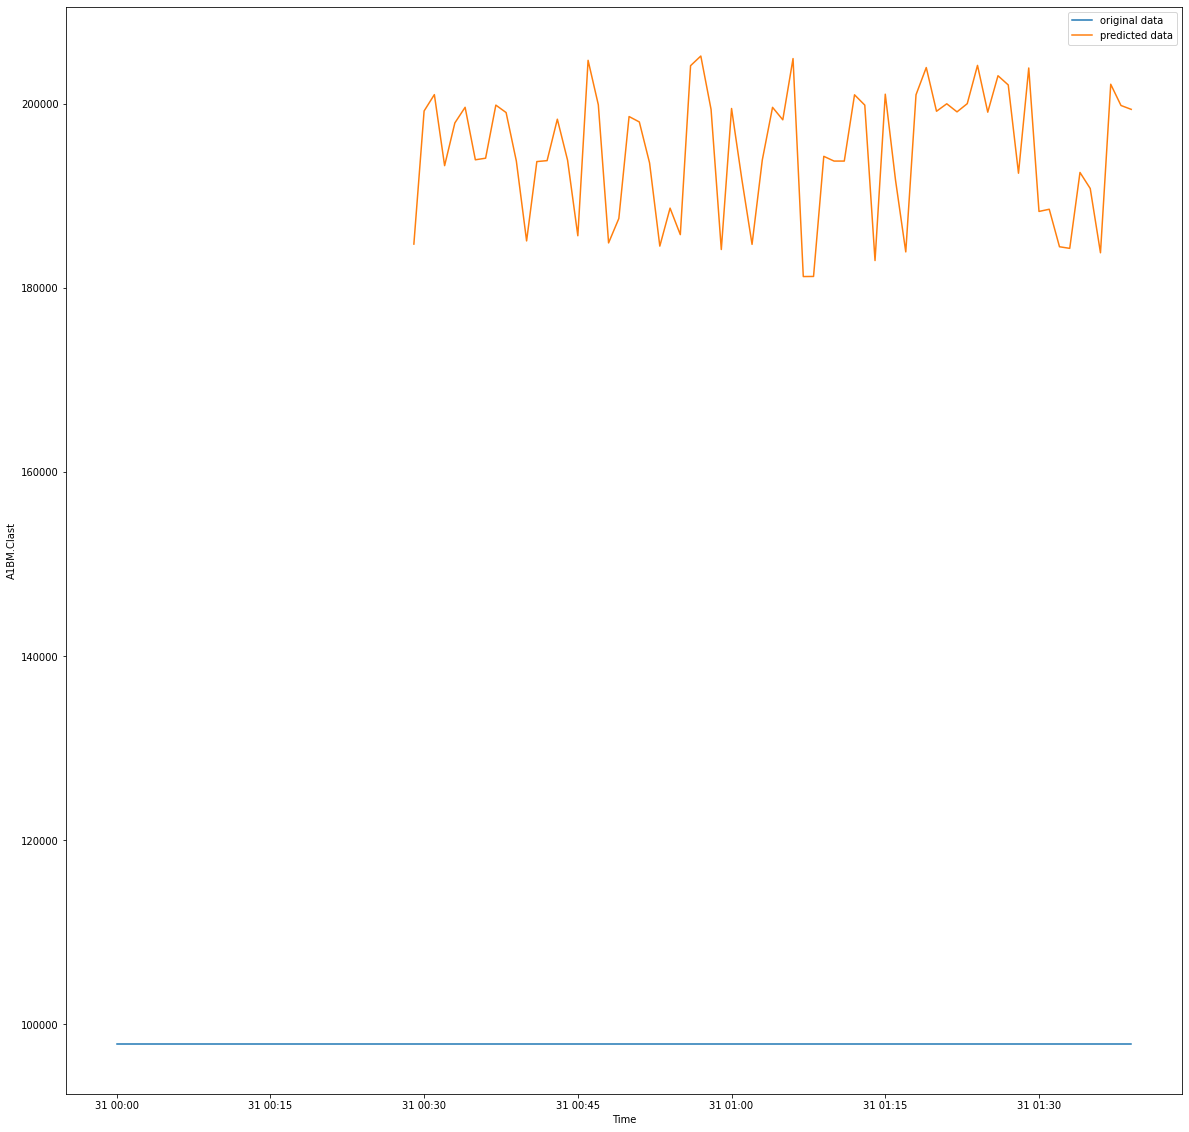

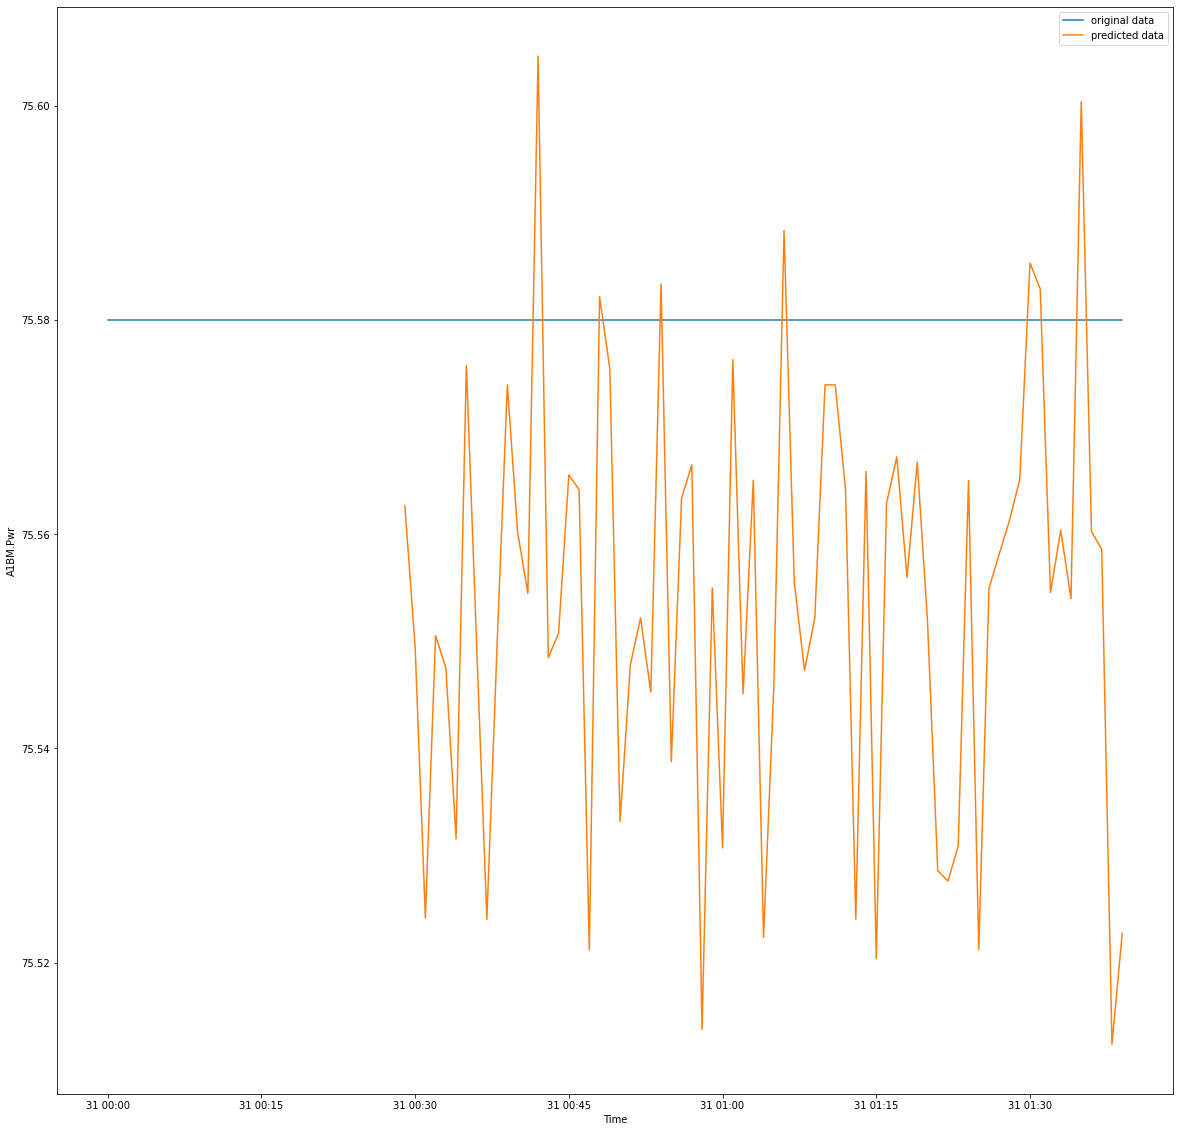

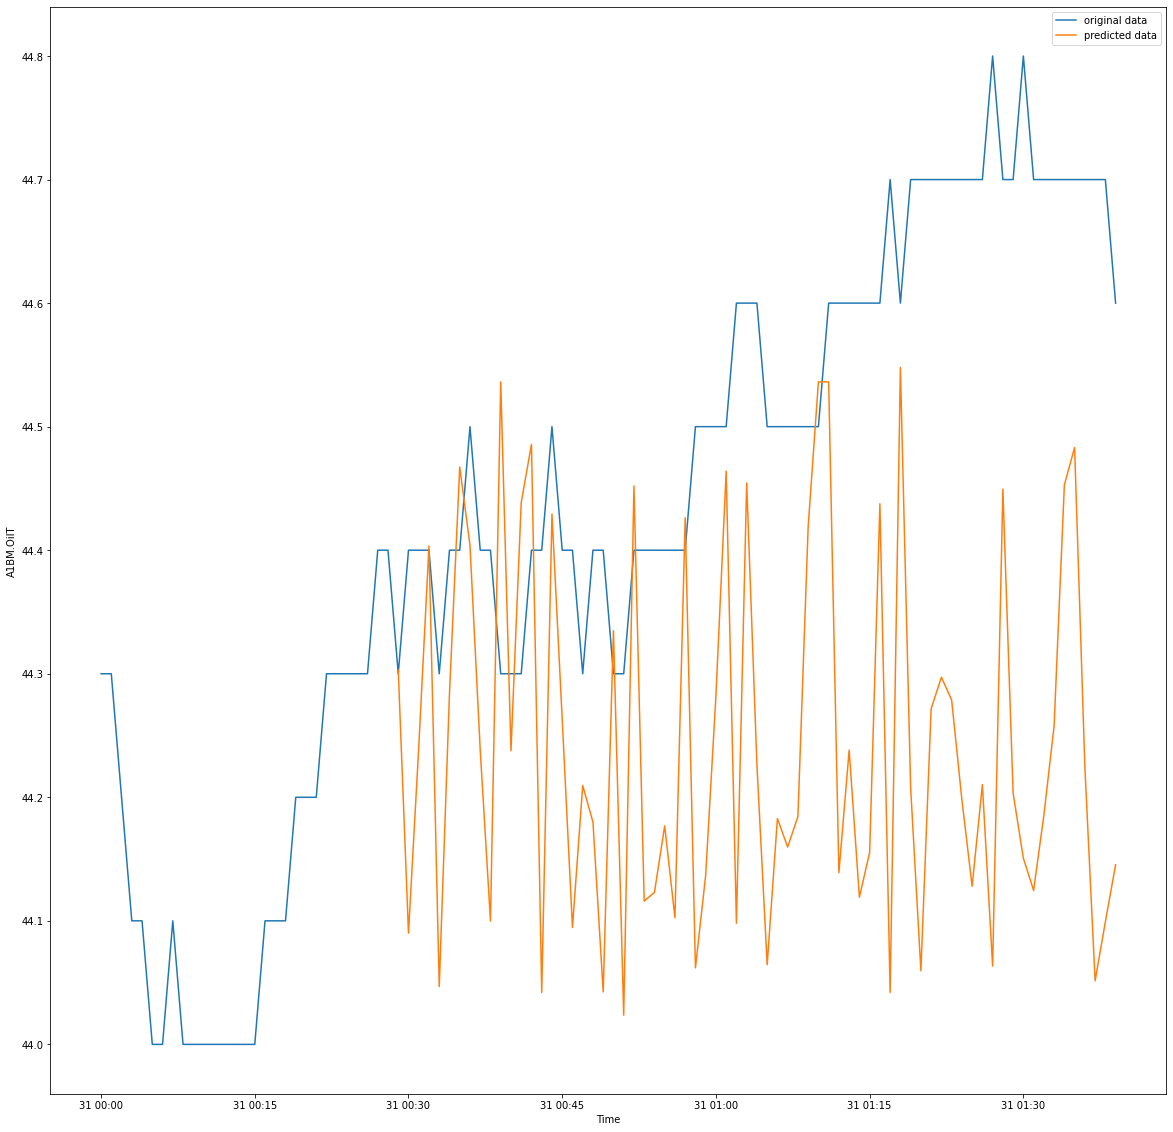

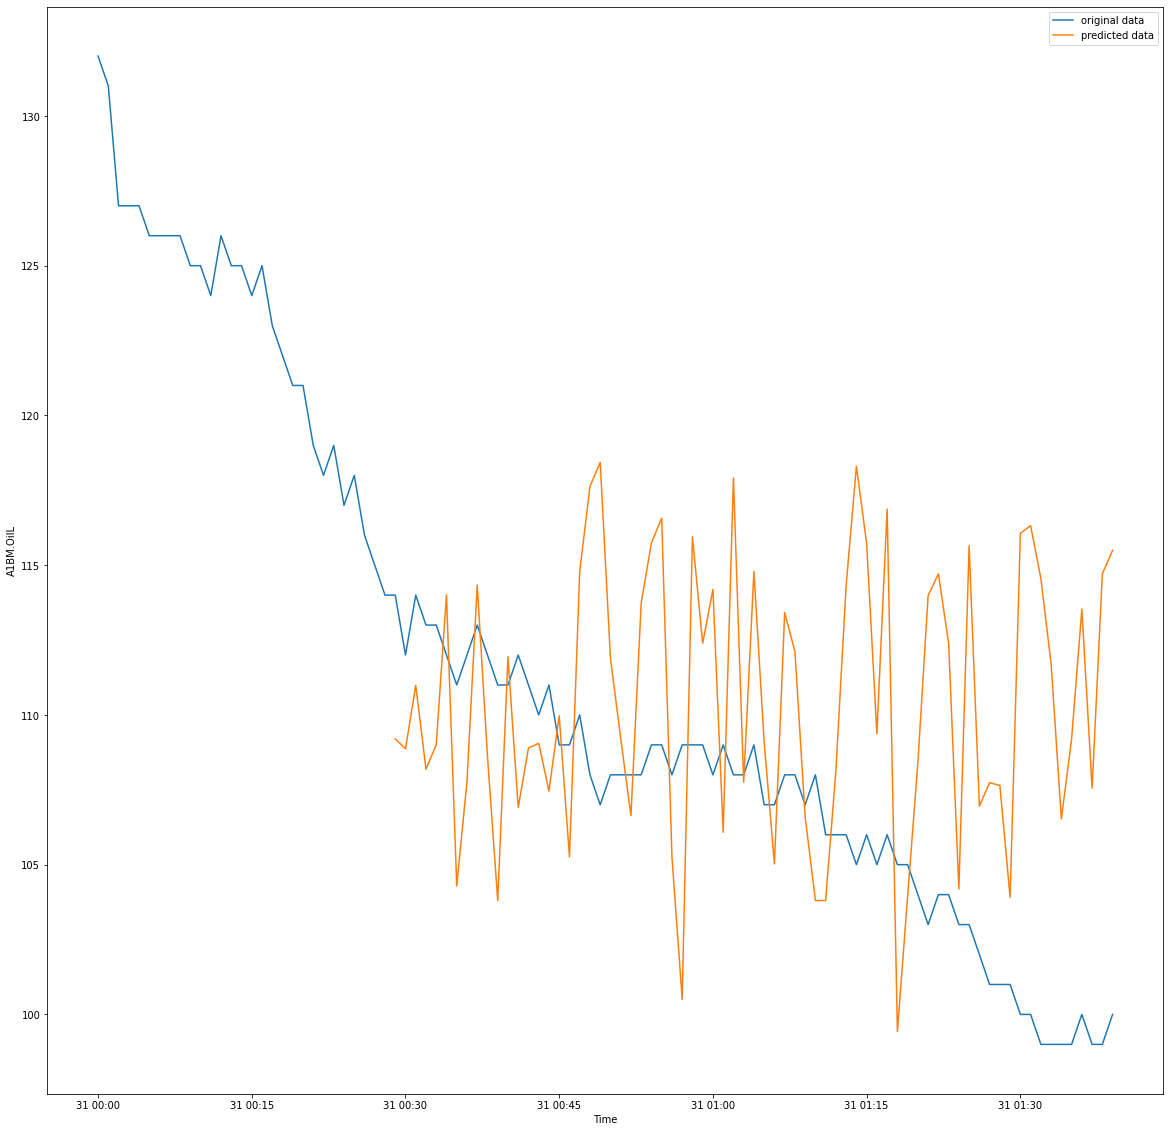

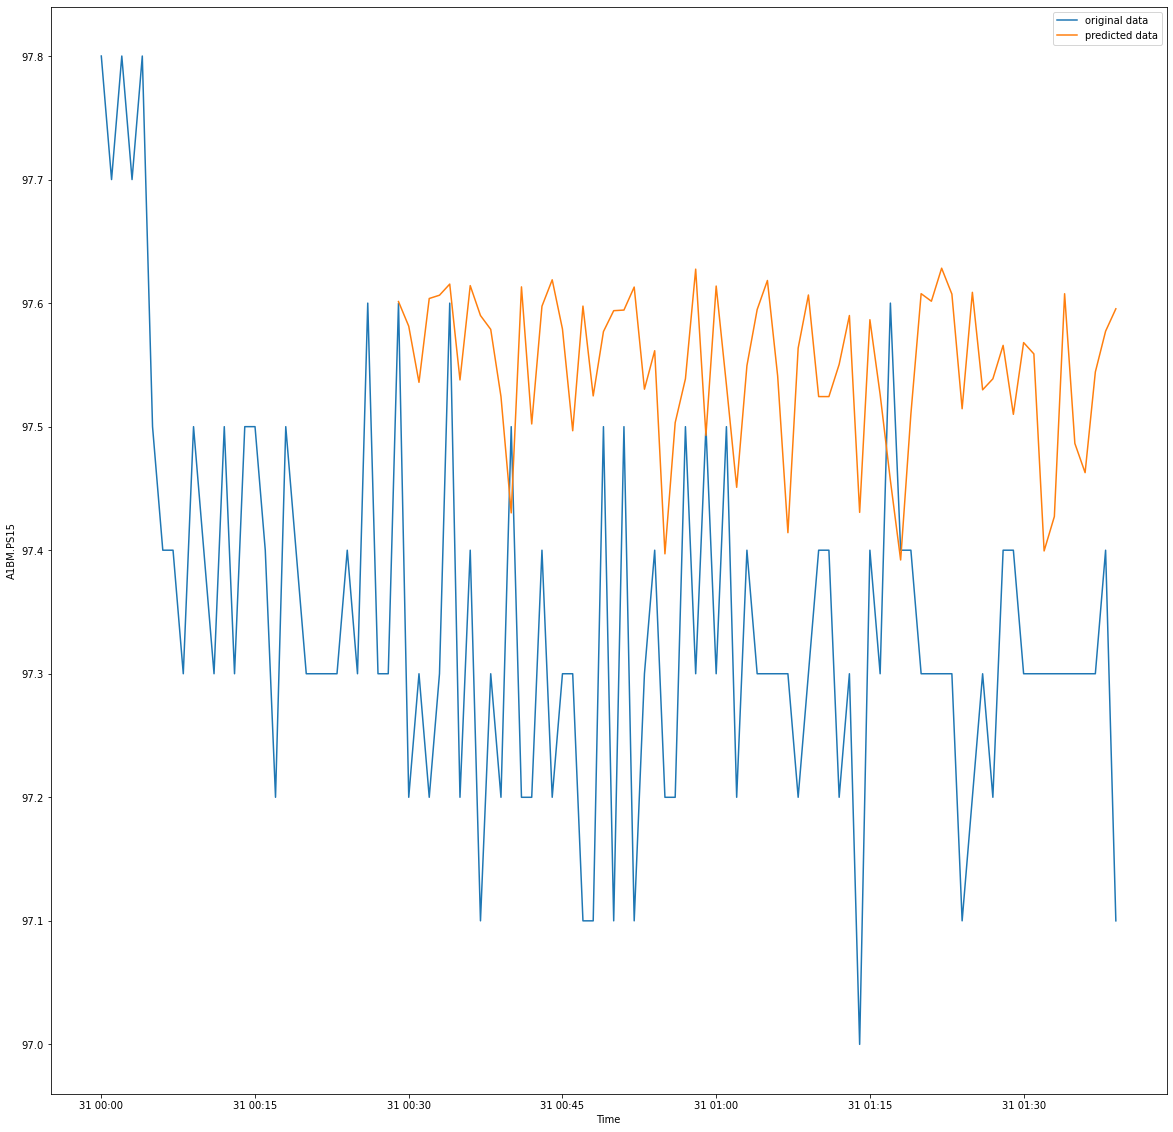

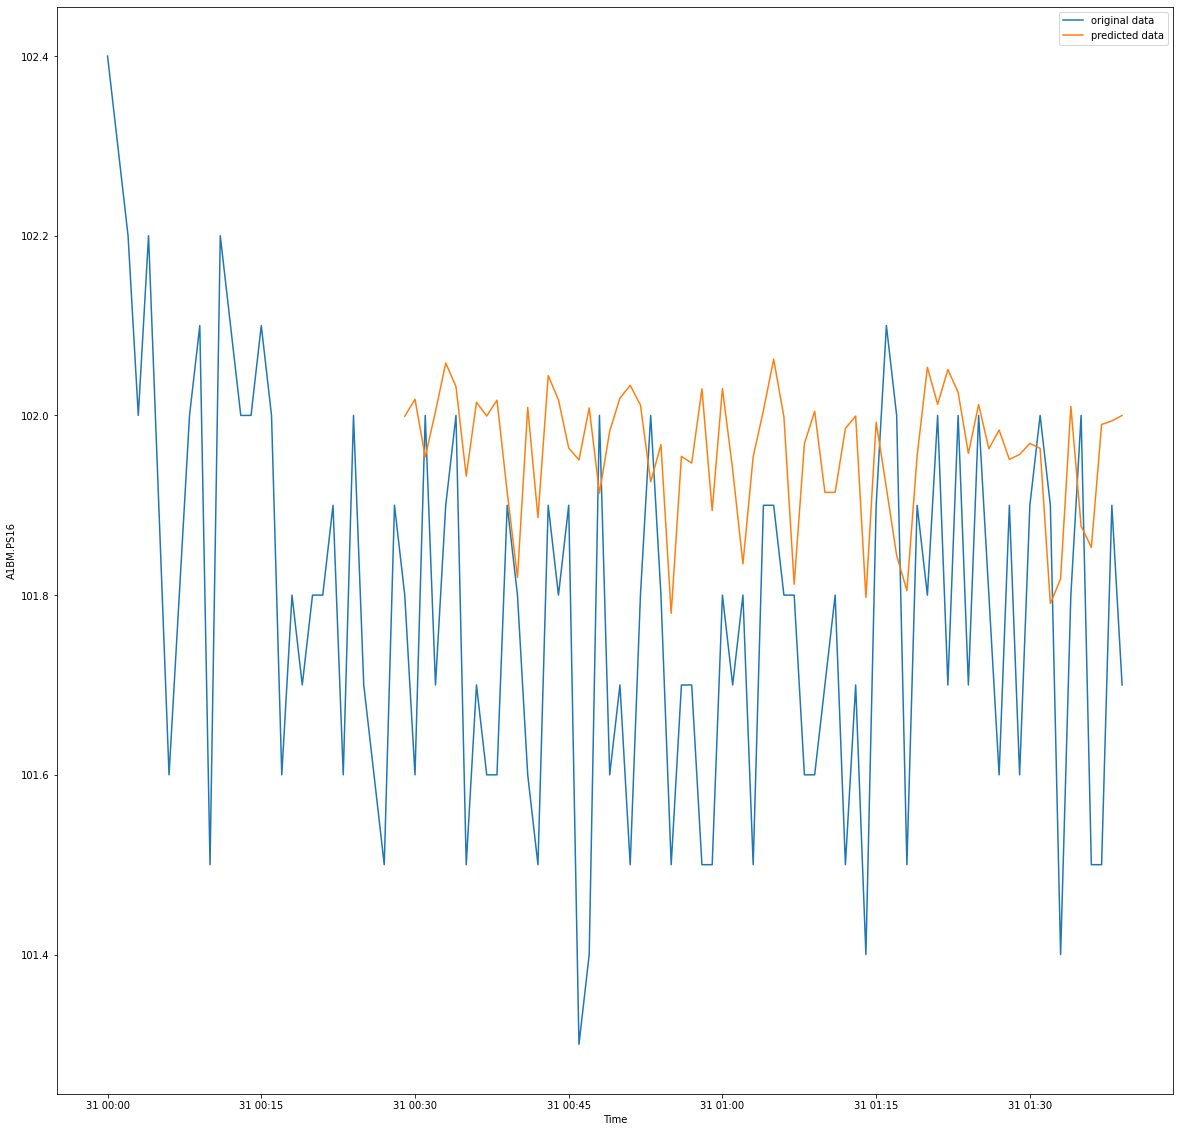

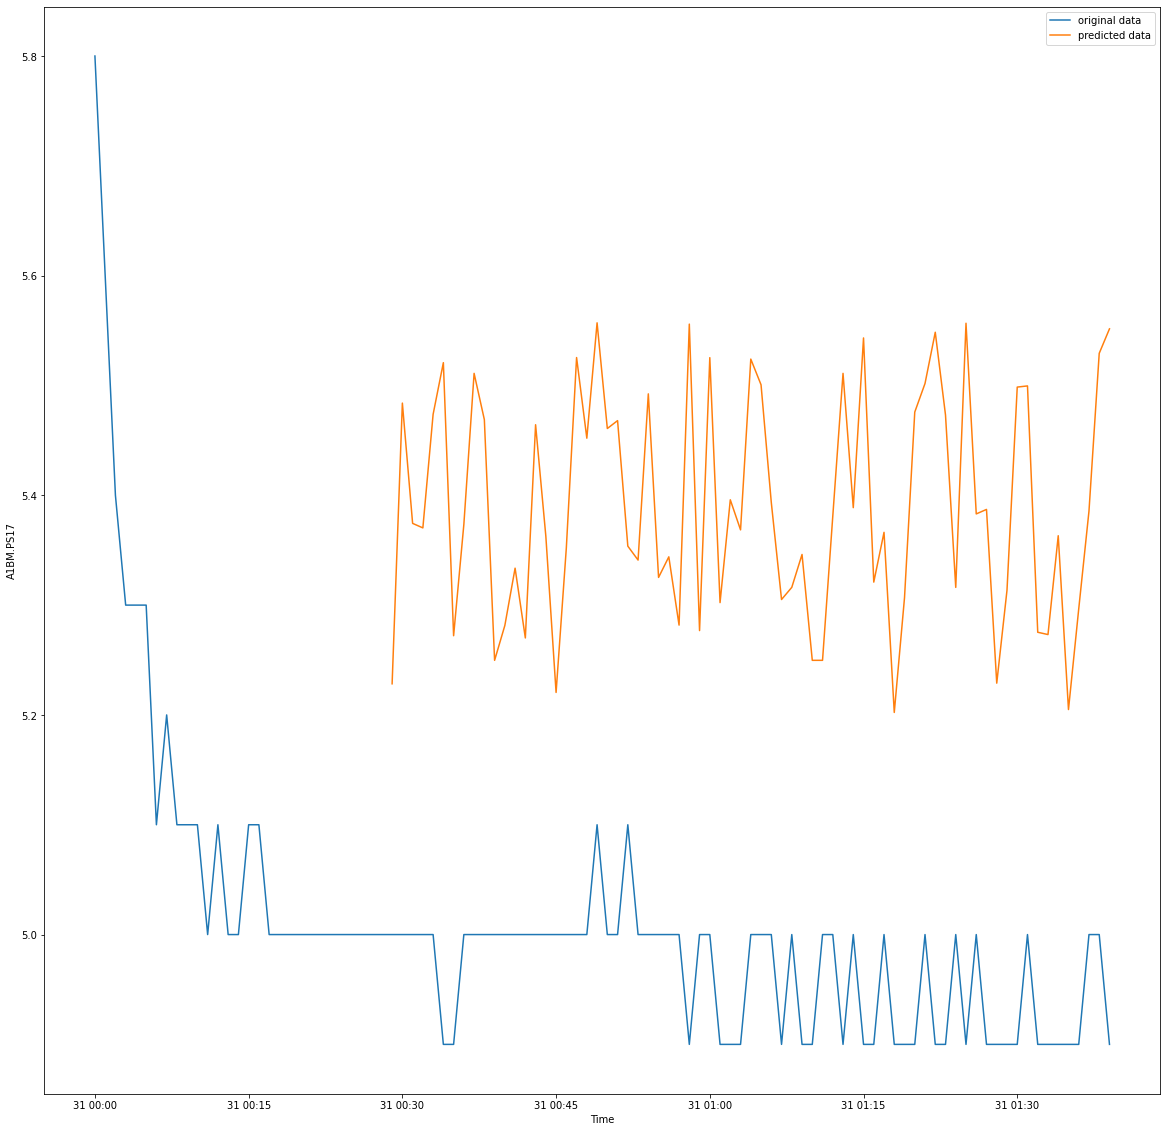

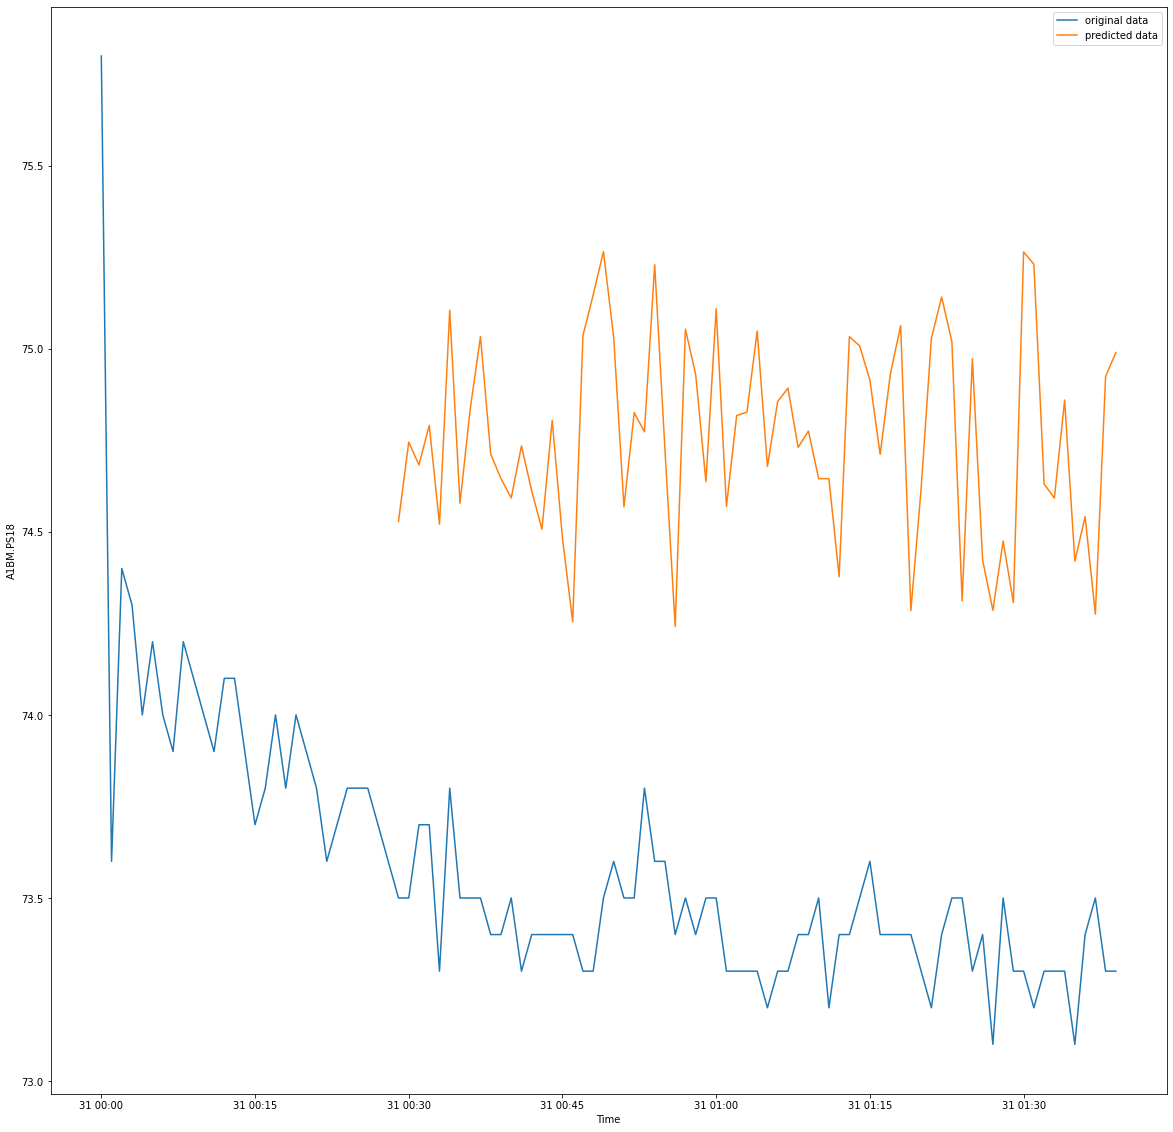

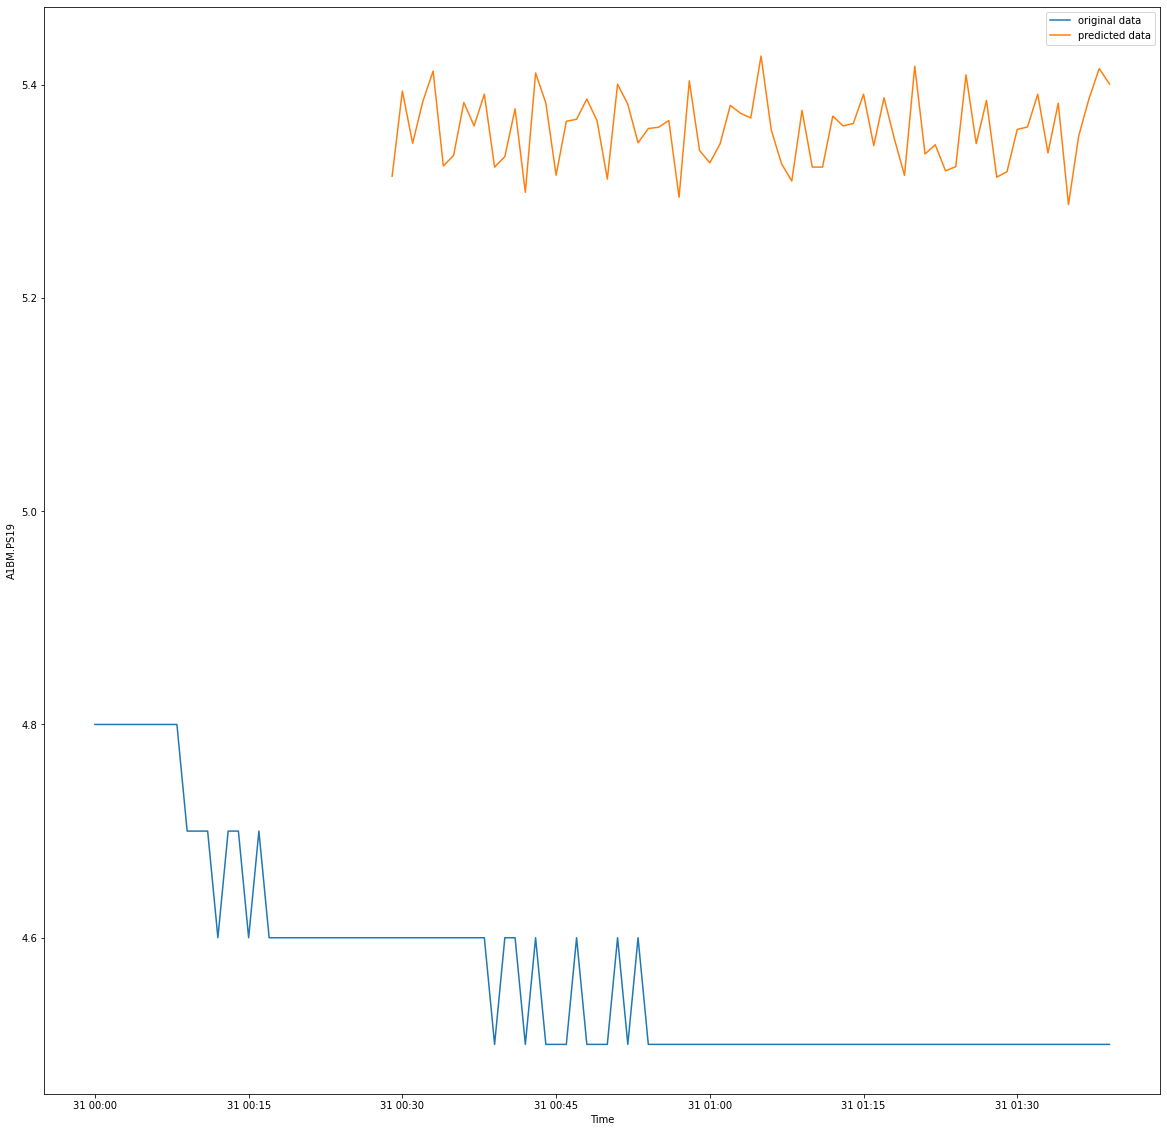

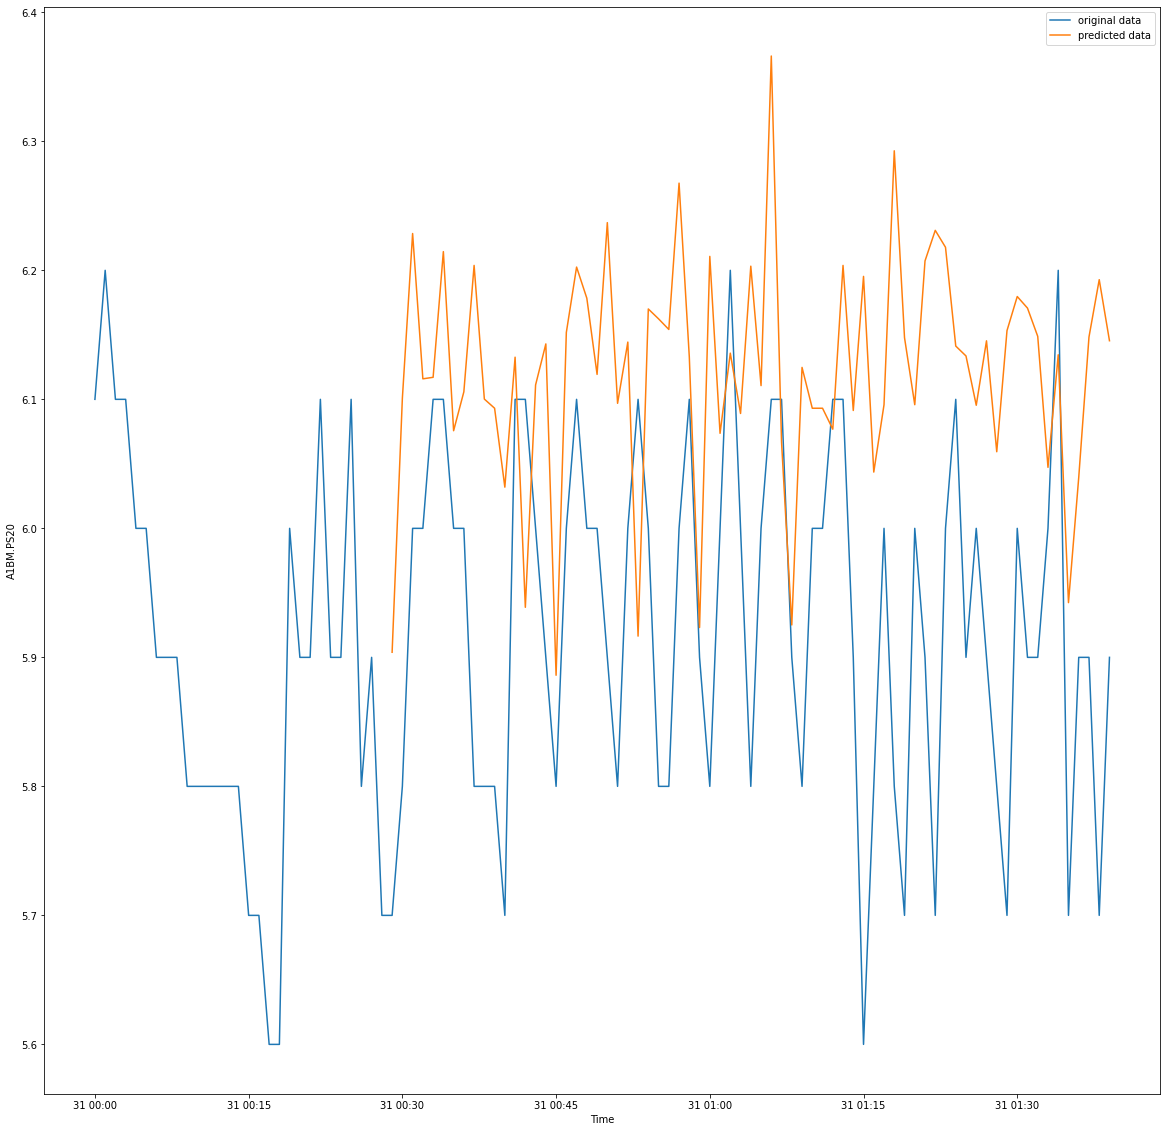

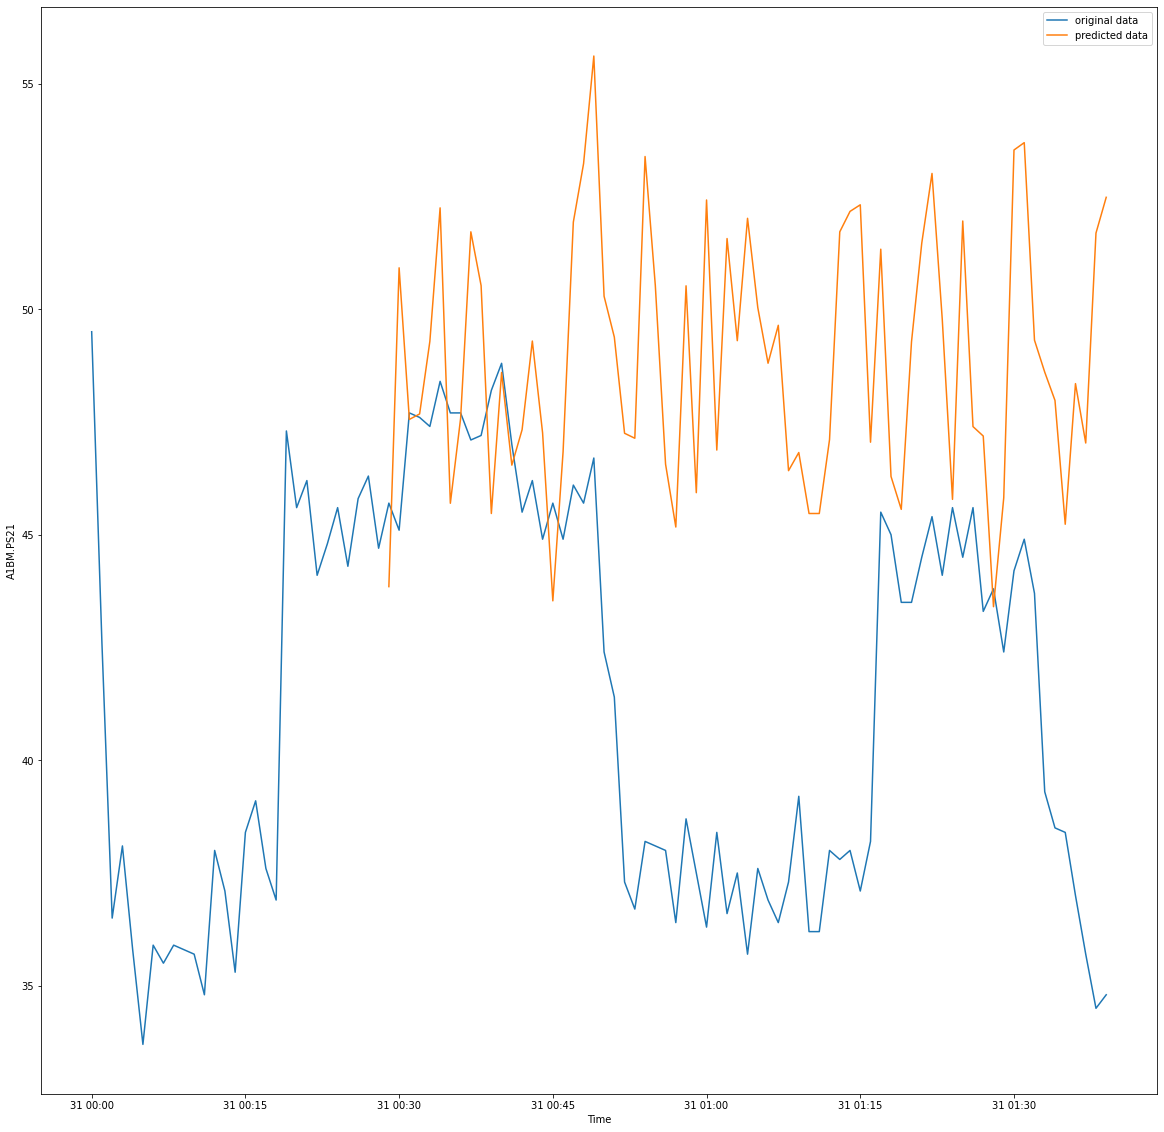

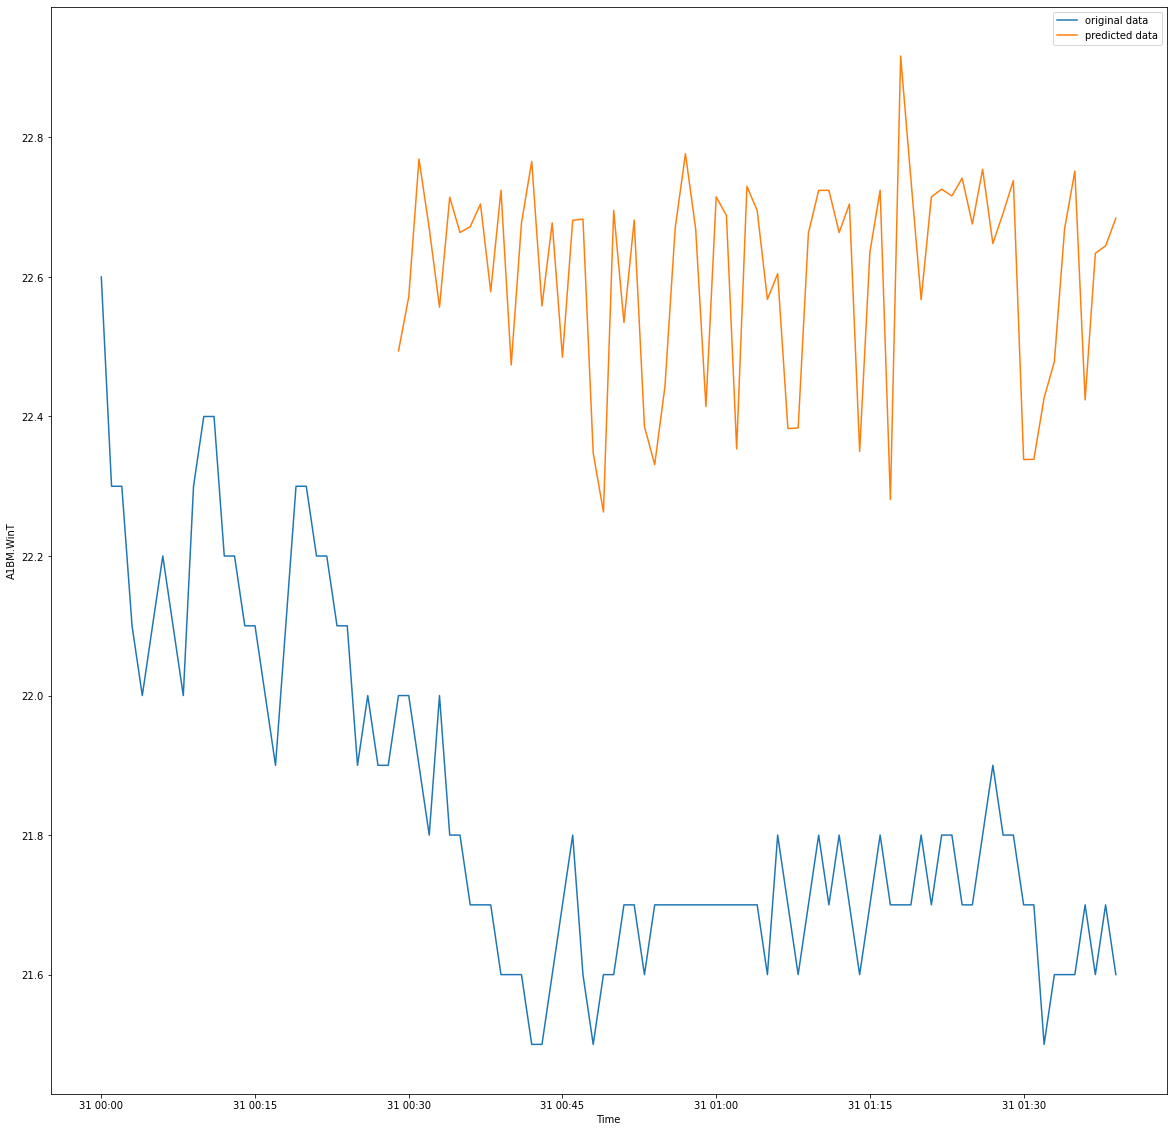

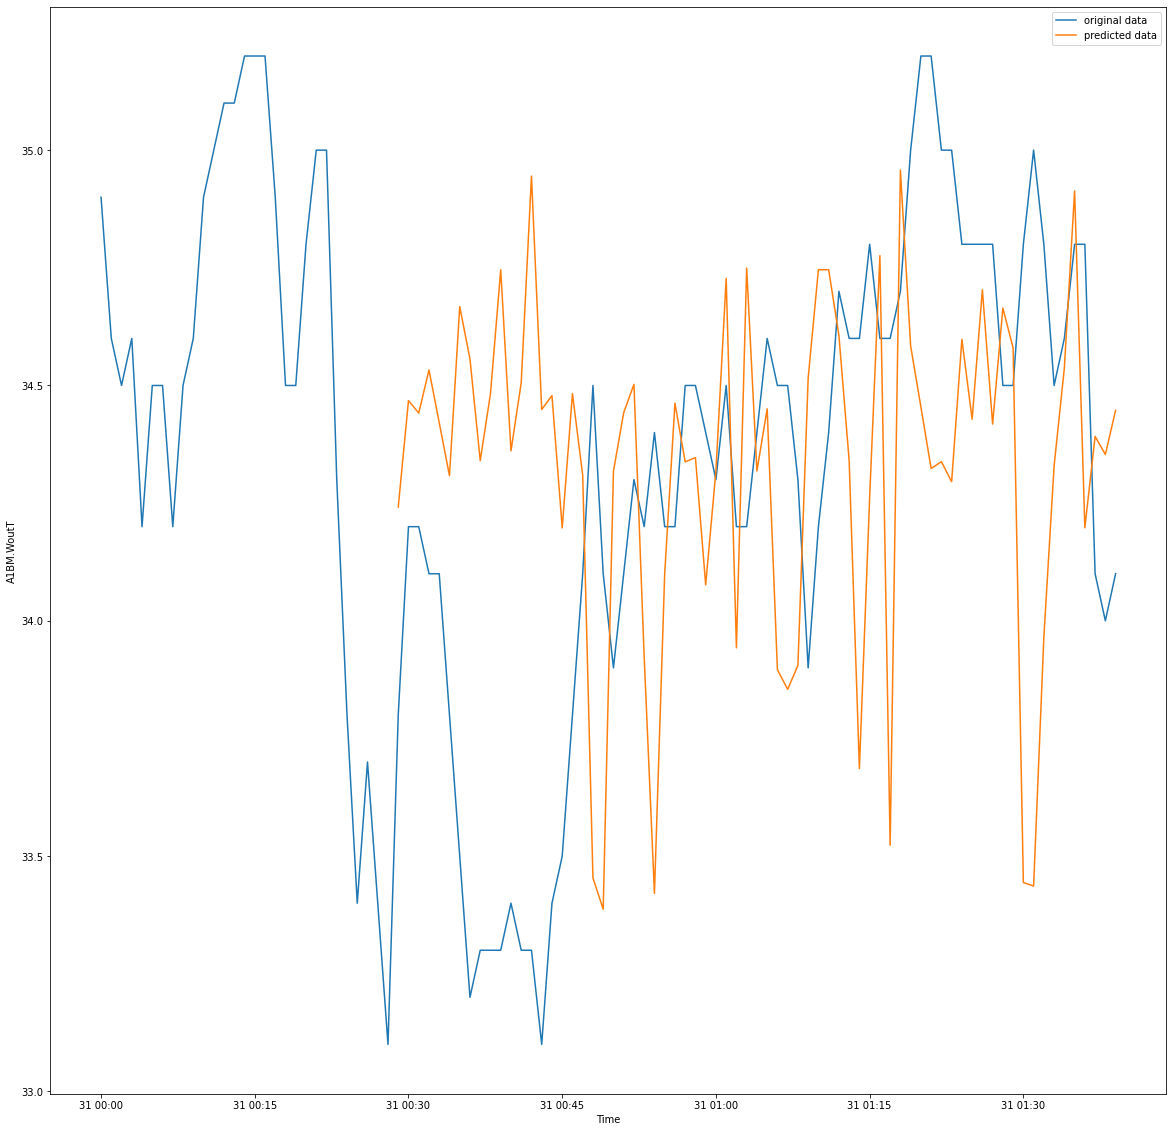

In [197]:
for j in range(len(x)):
    t = []
    arr=np.full((100-len(pp),1),np.nan)
    t.append(np.concatenate((arr, pp[:,j].reshape(-1,1)), axis=0).reshape(-1,1))
    plt.figure(figsize=(20,20))
    plt.plot(df['DateTime'][:100], df[x[j]][:100].replace(0,df[x[j]].mean()) , label='original data')
    plt.plot(df['DateTime'][:100], np.array(t).reshape(-1,1), label='predicted data')
    plt.xlabel('Time')
    plt.ylabel(x[j])
    plt.legend()
    plt.savefig(f"./1/_2_{x[j]}_{j}.png")

In [241]:
rr=np.full((tr.shape[0]-pp.shape[0],19),np.nan)

rr.shape
ll = np.concatenate((rr,pp), axis=0)
cf = pd.DataFrame(ll, columns=x)
cf["DateTime"] = df["DateTime"]
with pd.ExcelWriter('first_file.xlsx', engine="openpyxl", mode='a') as writer:
    cf.iloc[:,[19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].to_excel(writer, sheet_name='two_min', index=False, startrow=0 , startcol=0)